<a href="https://colab.research.google.com/github/MasDiptha12/Machine-Learning/blob/main/Week_2/Regression_Boston_House/Boston_House.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)
print(df.head())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


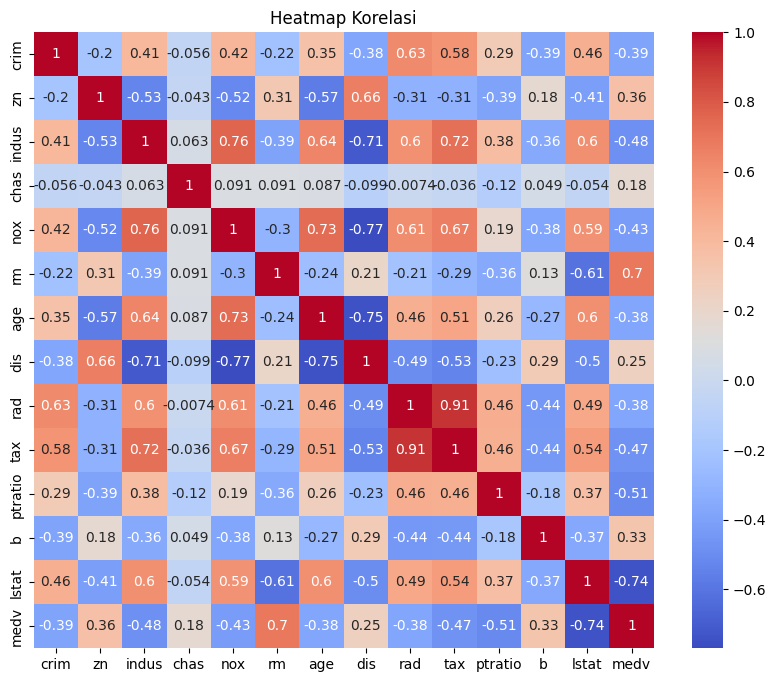

In [4]:
corr = df.corr()

# Heatmap korelasi
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Heatmap Korelasi")
plt.show()

$$
r = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2 \sum_{i=1}^{n} (y_i - \bar{y})^2}}
$$

Penjelasan Lengkap Persamaan Korelasi Pearson:

1. Definisi:
   - $r$ adalah koefisien korelasi Pearson yang mengukur kekuatan dan arah hubungan linear antara dua variabel.
   - Nilai $r$ berkisar antara -1 (korelasi negatif sempurna) hingga 1 (korelasi positif sempurna), dengan $r = 0$ artinya tidak ada hubungan linear yang signifikan.

2. Numerator:
   - Numerator, yaitu $\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})$, merupakan jumlah dari produk deviasi setiap nilai $x_i$ dan $y_i$ terhadap rata-rata masing-masing, $\bar{x}$ dan $\bar{y}$.
   - Jika nilai $x_i$ dan $y_i$ sama-sama di atas atau di bawah rata-rata, produk deviasinya positif, menandakan hubungan positif. Sebaliknya, jika salah satunya di atas dan yang lainnya di bawah rata-rata, produk deviasinya negatif, menandakan hubungan negatif.

3. Denumerator:
   - Denumerator adalah $\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2 \sum_{i=1}^{n} (y_i - \bar{y})^2}$.
   - Bagian ini menghitung total variasi masing-masing variabel dengan mengakumulasi kuadrat deviasi terhadap rata-rata, mengalikan kedua jumlah tersebut, lalu diakarkan. Ini menormalisasi nilai $r$, memastikan hasilnya selalu berada dalam rentang -1 sampai 1.

4. Interpretasi:
   - $r = 1$: Hubungan linear positif sempurna, artinya kenaikan $x$ selalu diiringi kenaikan $y$ secara proporsional.
   - $r = -1$: Hubungan linear negatif sempurna, artinya kenaikan $x$ diiringi penurunan $y$ secara proporsional.
   - $r = 0$: Tidak ada hubungan linear yang signifikan antara variabel.

5. Aplikasi:
   - Persamaan ini sering digunakan dalam statistik, machine learning, dan penelitian untuk mengevaluasi serta memahami hubungan antara variabel.
   - Normalisasi pada denumerator memastikan bahwa skala variabel tidak mempengaruhi besarnya koefisien korelasi.

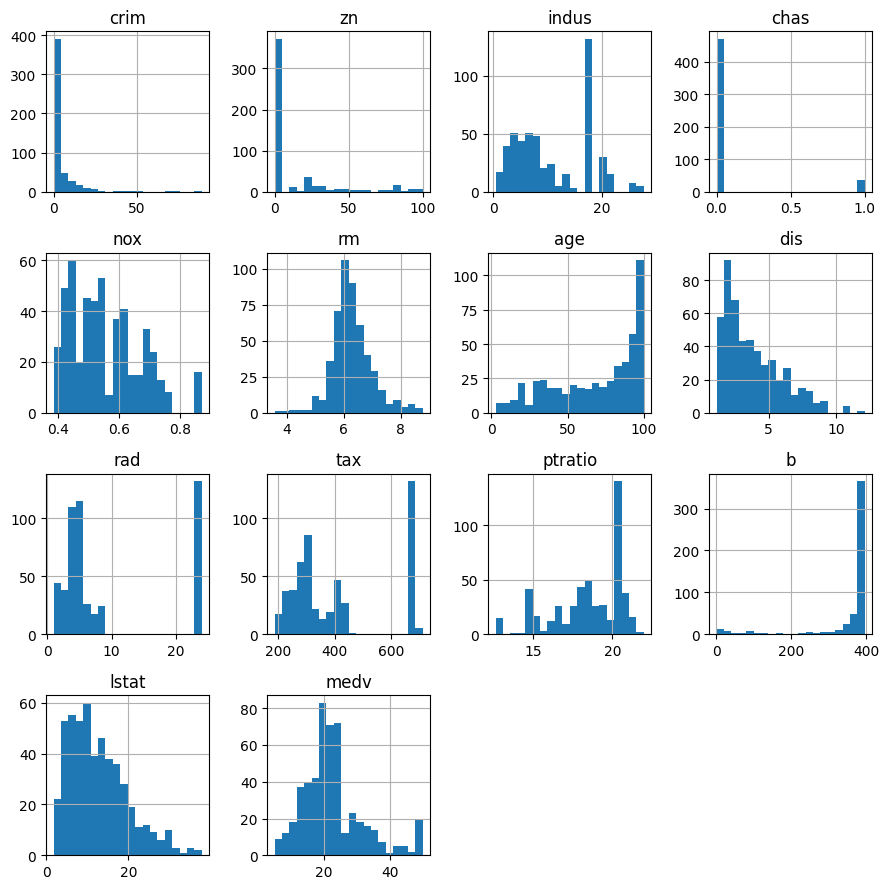

In [5]:
df.hist(bins=20, figsize=(9, 9))
plt.tight_layout()
plt.show()

Skewness tiap fitur:
crim       5.223149
zn         2.225666
indus      0.295022
chas       3.405904
nox        0.729308
rm         0.403612
age       -0.598963
dis        1.011781
rad        1.004815
tax        0.669956
ptratio   -0.802325
b         -2.890374
lstat      0.906460
medv       1.108098
dtype: float64


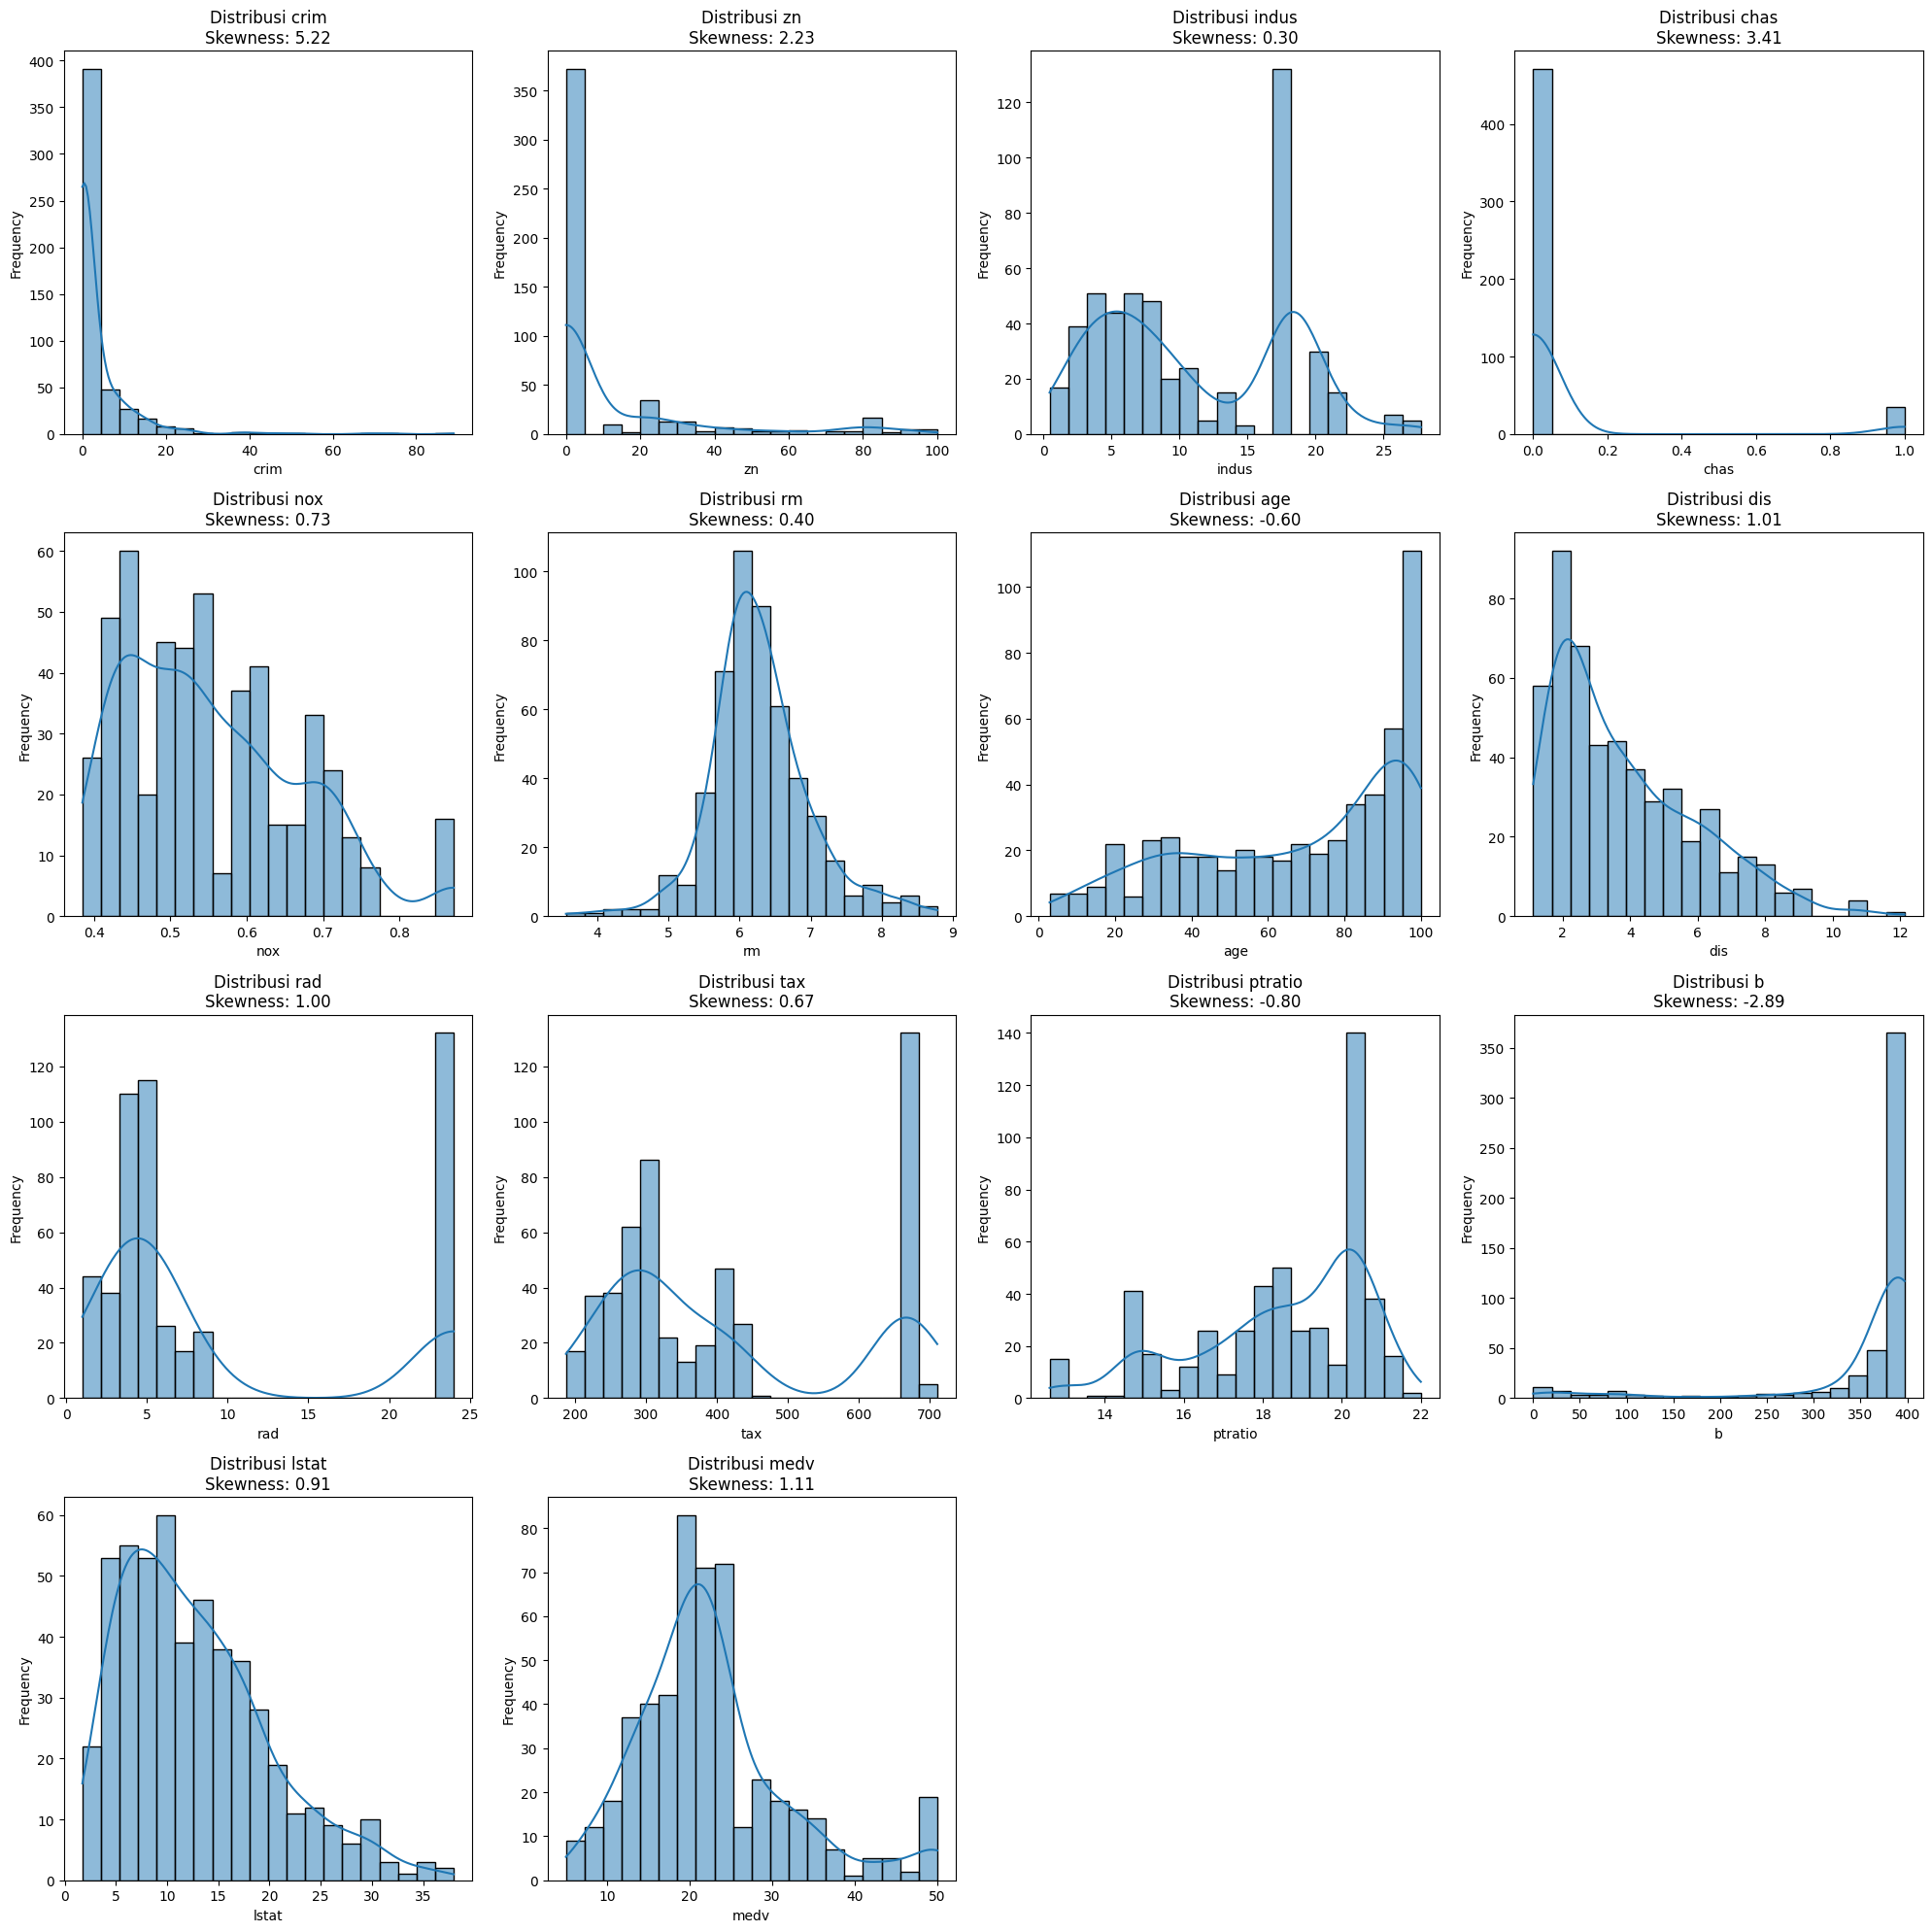

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

print("Skewness tiap fitur:")
print(df.skew())

# Buat figure dengan grid 4x4
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
axes = axes.flatten()

# Plot tiap fitur di subplot yang udah disediakan
for ax, col in zip(axes, df.columns):
    sns.histplot(df[col], kde=True, bins=20, ax=ax)
    ax.set_title(f'Distribusi {col}\nSkewness: {df[col].skew():.2f}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# Matikan subplot yang kosong kalo fitur kurang dari 16
if len(df.columns) < len(axes):
    for ax in axes[len(df.columns):]:
        ax.axis('off')

plt.tight_layout()
plt.show()

In [7]:
import numpy as np

# Contoh transformasi log untuk fitur dengan positive skew
df['crim_log'] = np.log1p(df['crim'])
df['zn_log']   = np.log1p(df['zn'])
df['chas_log'] = np.log1p(df['chas'])  # meskipun chas itu dummy, tapi nilainya skewed karena ketidakseimbangan

# Untuk fitur dengan negative skew, lo bisa coba transformasi Yeo-Johnson
from scipy import stats
df['b_yj'], _ = stats.yeojohnson(df['b'])

# Liat lagi skewnessnya setelah transformasi
print("Skewness setelah transformasi:")
print(df[['crim_log', 'zn_log', 'chas_log', 'b_yj']].skew())

Skewness setelah transformasi:
crim_log    1.269201
zn_log      1.193451
chas_log    3.405904
b_yj       -1.908672
dtype: float64


$$
y^{(\lambda)} =
\begin{cases}
\displaystyle \frac{(y+1)^\lambda - 1}{\lambda}, & \text{if } y \ge 0 \text{ and } \lambda \neq 0, \\[10pt]
\log(y+1), & \text{if } y \ge 0 \text{ and } \lambda = 0, \\[10pt]
-\displaystyle \frac{(-y+1)^{2-\lambda} - 1}{2-\lambda}, & \text{if } y < 0 \text{ and } \lambda \neq 2, \\[10pt]
-\log(-y+1), & \text{if } y < 0 \text{ and } \lambda = 2.
\end{cases}
$$


In [8]:
# Simpan fitur yang sudah ditransformasi dalam variabel
transformed_features = ['crim_log', 'zn_log', 'chas_log', 'b_yj']

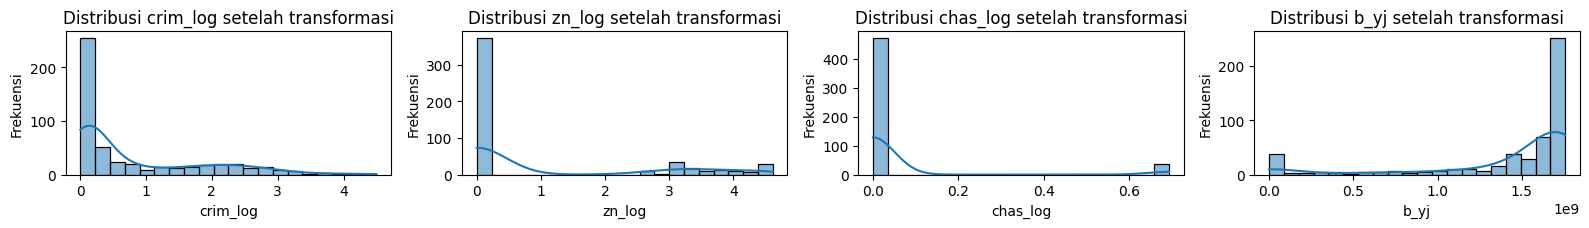

In [9]:
fig, axes = plt.subplots(4, 4, figsize=(16, 8))  # 4x4 grid, total 16 subplot
axes = axes.flatten()

# Looping buat plot tiap fitur
for i, feature in enumerate(transformed_features):
    sns.histplot(df[feature], kde=True, bins=20, ax=axes[i])
    axes[i].set_title(f'Distribusi {feature} setelah transformasi')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frekuensi')

# Hapus axes yang gak kepake (biar gak nampilin plot kosong)
for j in range(i + 1, 16):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Copy dataset dan replace fitur asli dengan transformasi yang udah dibuat
df_model = df.copy()
df_model['crim'] = df_model['crim_log']
df_model['zn']   = df_model['zn_log']
df_model['chas'] = df_model['chas_log']
df_model['b']    = df_model['b_yj']

# Misal targetnya tetap 'medv'
X = df_model.drop(['medv', 'crim_log', 'zn_log', 'chas_log', 'b_yj'], axis=1)
y = df_model['medv']

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training model Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 24.950581042460257


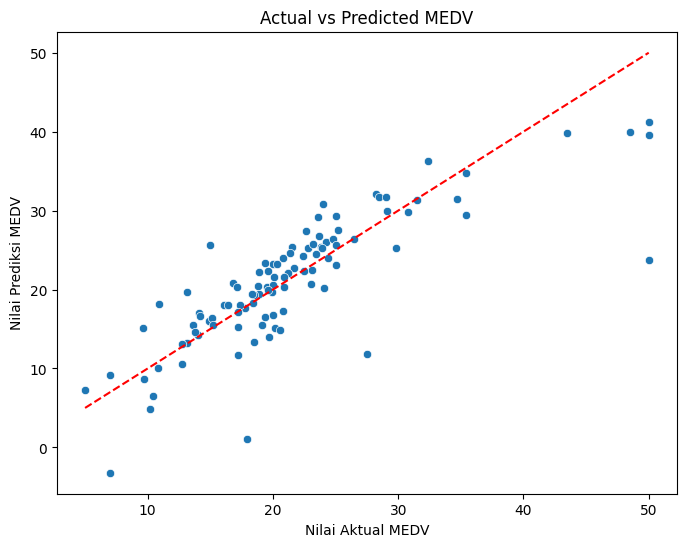

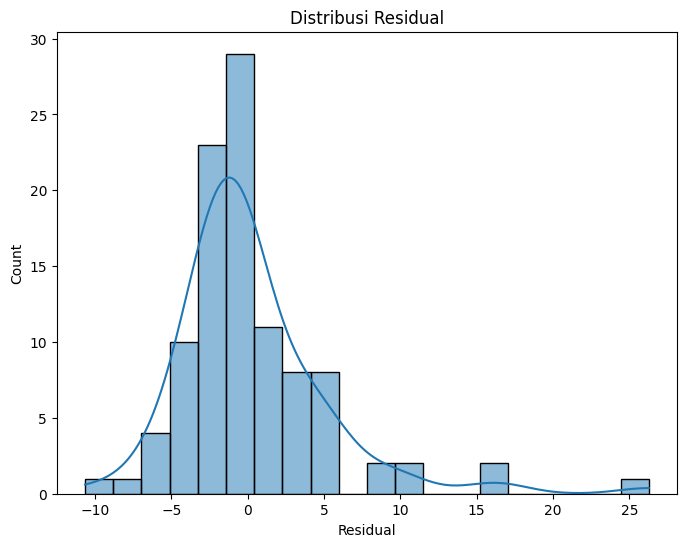

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Nilai Aktual MEDV")
plt.ylabel("Nilai Prediksi MEDV")
plt.title("Actual vs Predicted MEDV")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # line perfect prediction
plt.show()

# Visualisasi distribusi residual
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=20)
plt.xlabel("Residual")
plt.title("Distribusi Residual")
plt.show()

# TRANSFORMASI DATA


LOG TRANSFORM

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
import pandas as pd

url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)
print(df.head())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


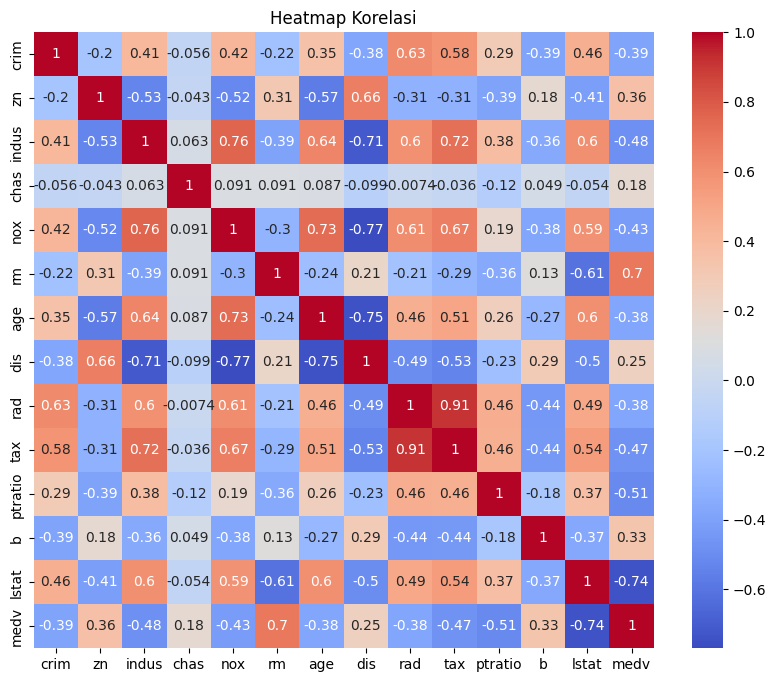

In [19]:
corr = df.corr()

# Heatmap korelasi
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Heatmap Korelasi")
plt.show()

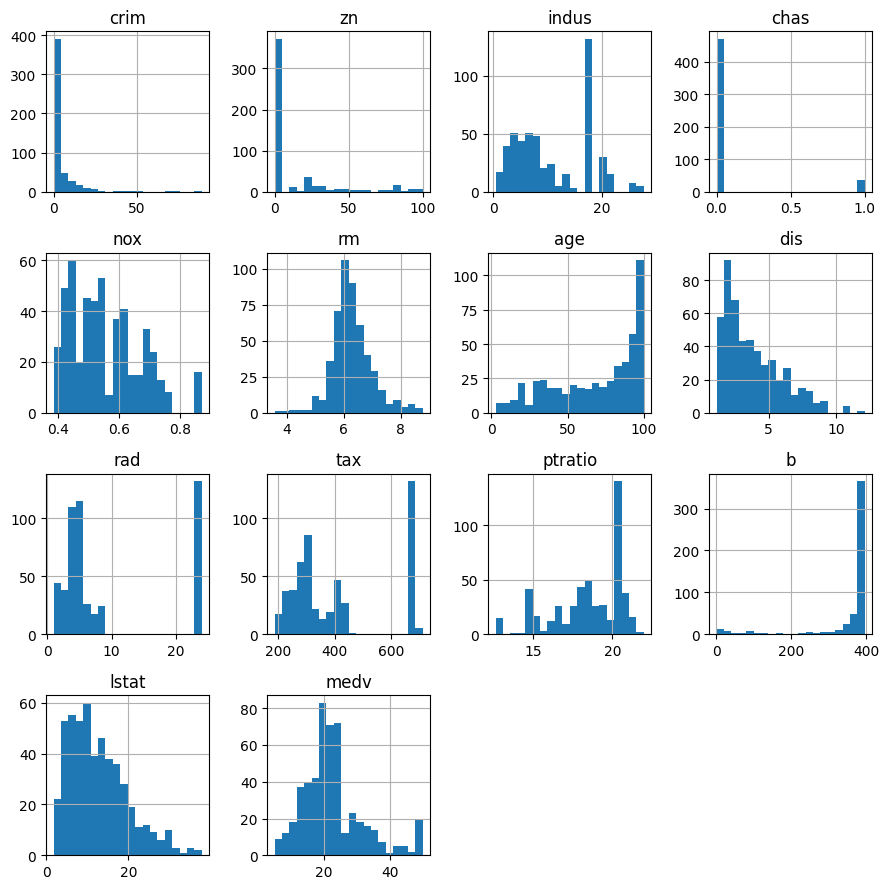

In [20]:
df.hist(bins=20, figsize=(9, 9))
plt.tight_layout()
plt.show()


Skewness tiap fitur:
crim       5.223149
zn         2.225666
indus      0.295022
chas       3.405904
nox        0.729308
rm         0.403612
age       -0.598963
dis        1.011781
rad        1.004815
tax        0.669956
ptratio   -0.802325
b         -2.890374
lstat      0.906460
medv       1.108098
dtype: float64


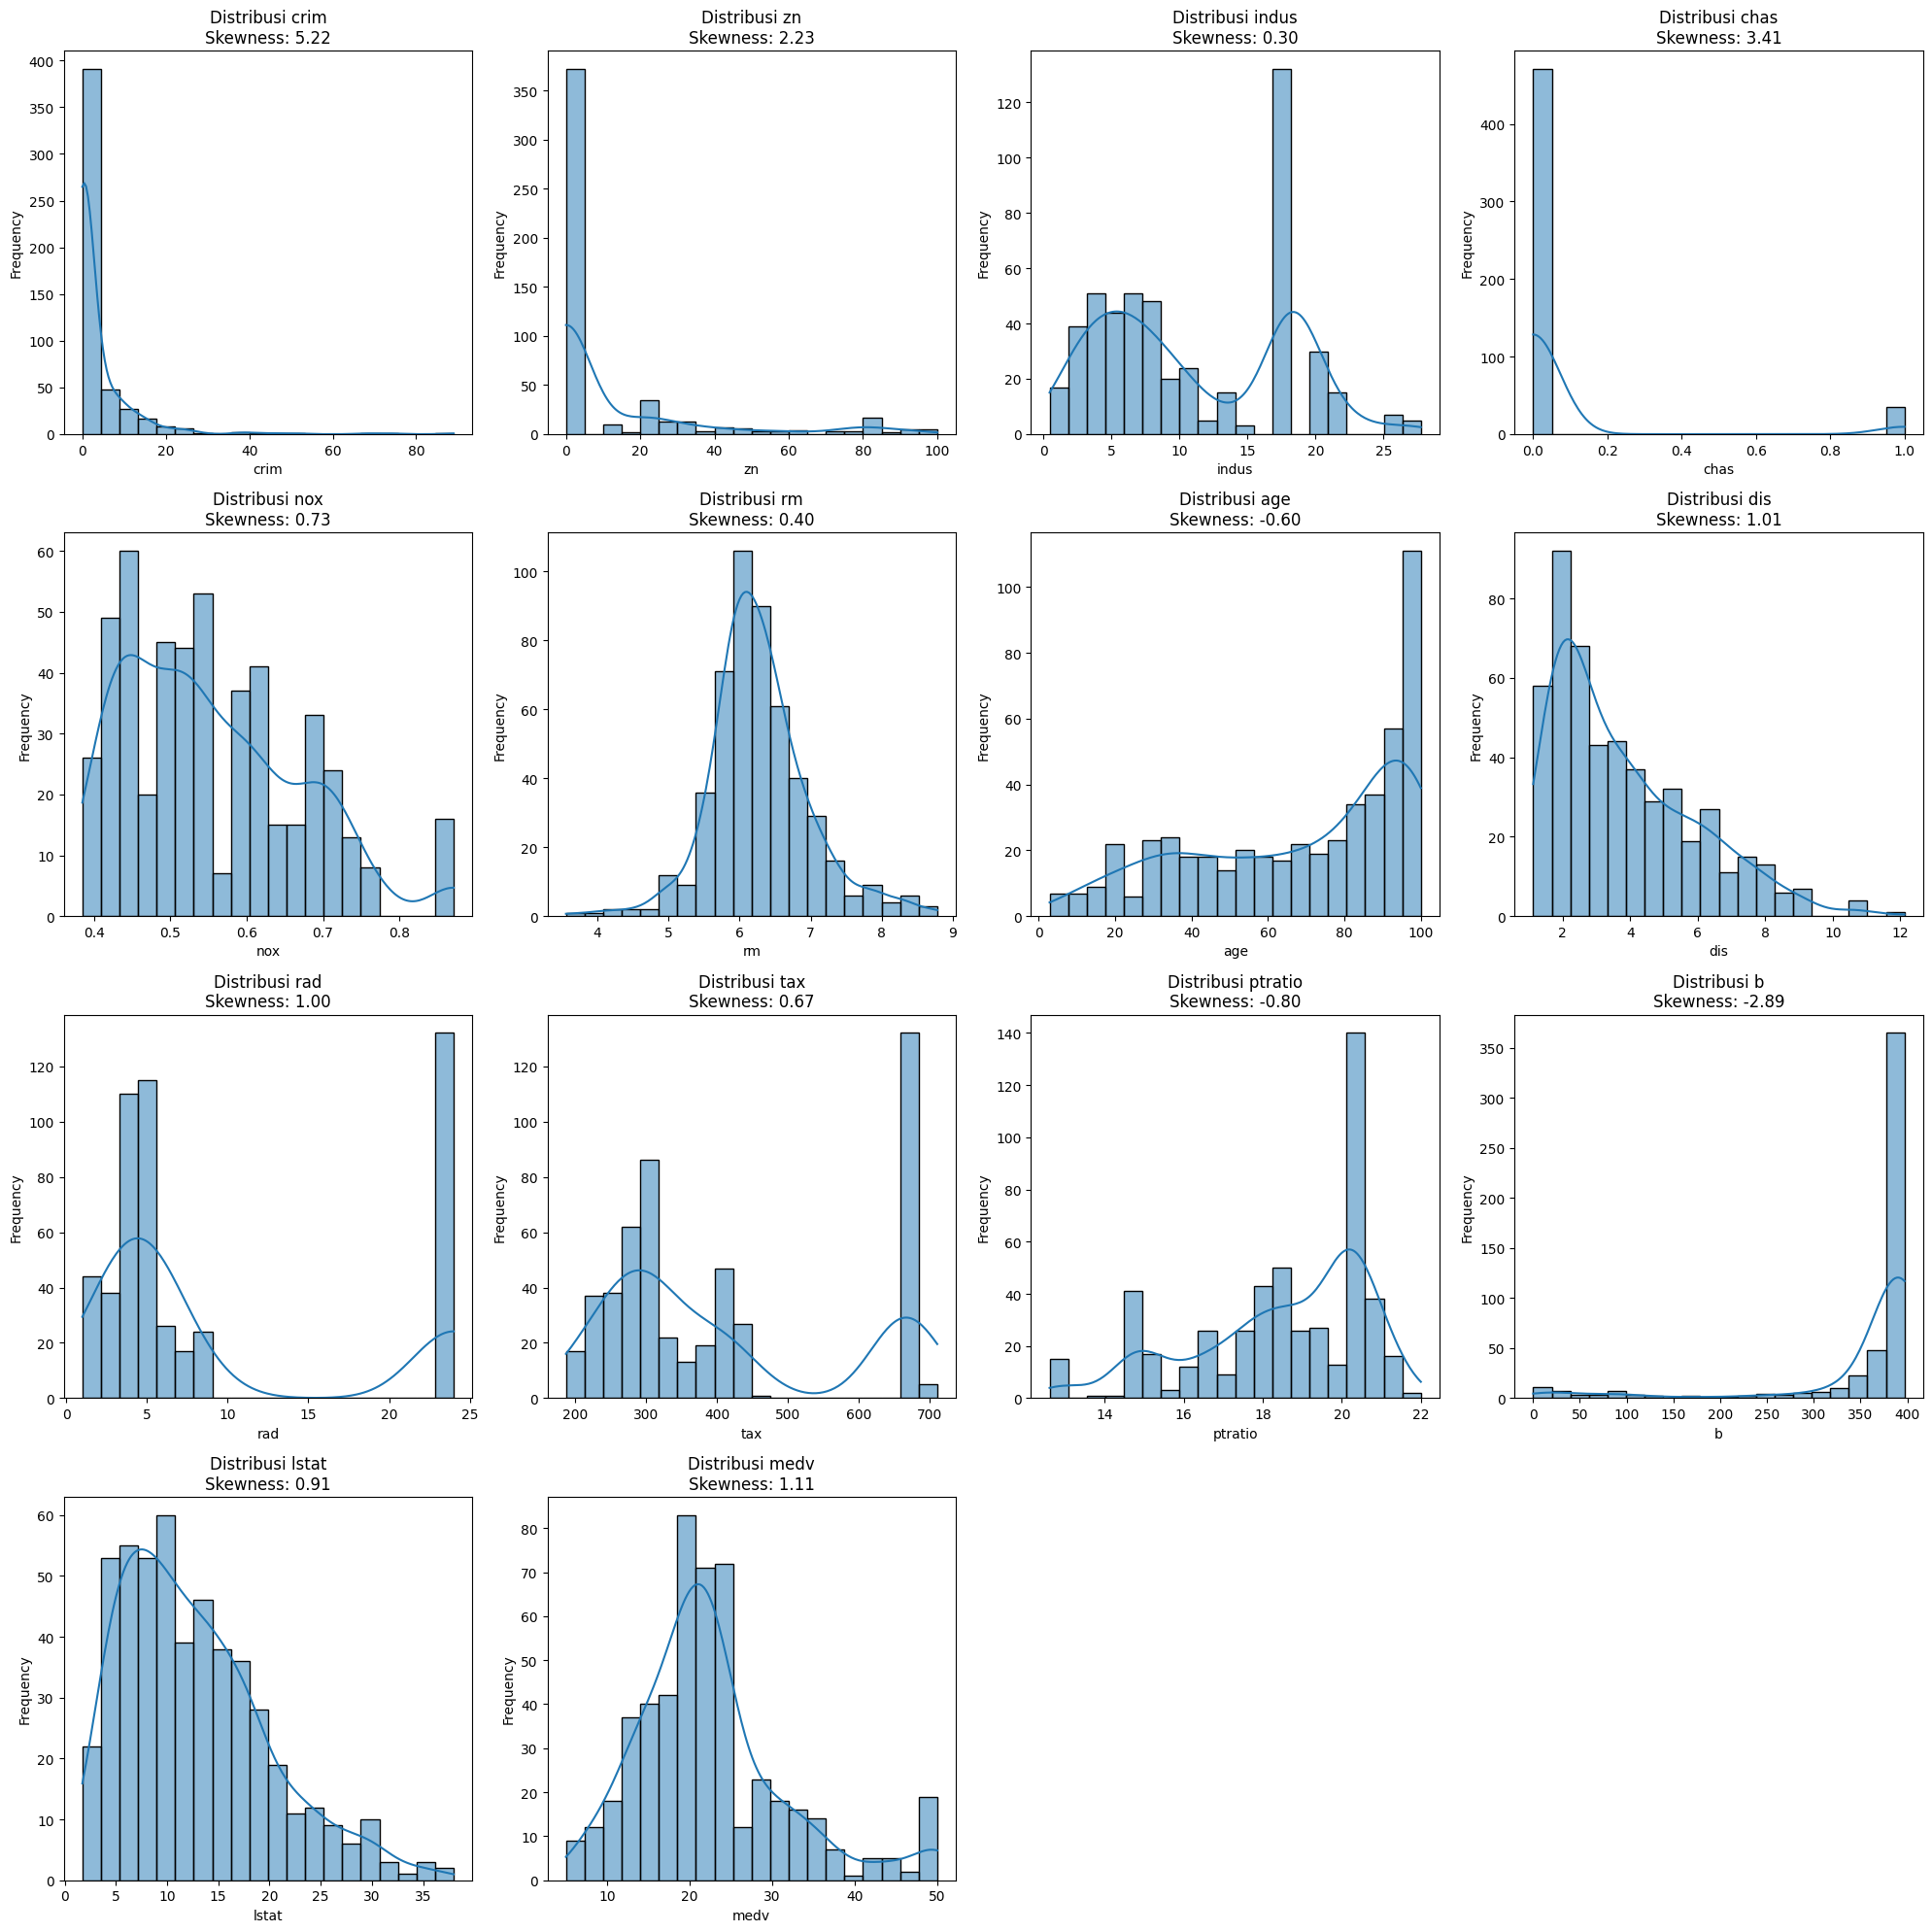

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

print("Skewness tiap fitur:")
print(df.skew())

# Buat figure dengan grid 4x4
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
axes = axes.flatten()

# Plot tiap fitur di subplot yang sudah disediakan
for ax, col in zip(axes, df.columns):
    sns.histplot(df[col], kde=True, bins=20, ax=ax)
    ax.set_title(f'Distribusi {col}\nSkewness: {df[col].skew():.2f}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# Matikan subplot yang kosong kalau fitur kurang dari 16
if len(df.columns) < len(axes):
    for ax in axes[len(df.columns):]:
        ax.axis('off')

plt.tight_layout()
plt.show()


In [22]:
import numpy as np
from scipy import stats

# Contoh transformasi log untuk fitur dengan positive skew
df['crim_log'] = np.log1p(df['crim'])
df['zn_log']   = np.log1p(df['zn'])
df['chas_log'] = np.log1p(df['chas'])  # CHAS dummy, tapi tetap skewed

# Untuk fitur dengan negative skew, coba transformasi Yeo-Johnson
df['b_yj'], _ = stats.yeojohnson(df['b'])

# Lihat lagi skewness setelah transformasi
print("Skewness setelah transformasi:")
print(df[['crim_log', 'zn_log', 'chas_log', 'b_yj']].skew())


Skewness setelah transformasi:
crim_log    1.269201
zn_log      1.193451
chas_log    3.405904
b_yj       -1.908672
dtype: float64


In [23]:
# Simpan fitur yang sudah ditransformasi dalam variabel
transformed_features = ['crim_log', 'zn_log', 'chas_log', 'b_yj']

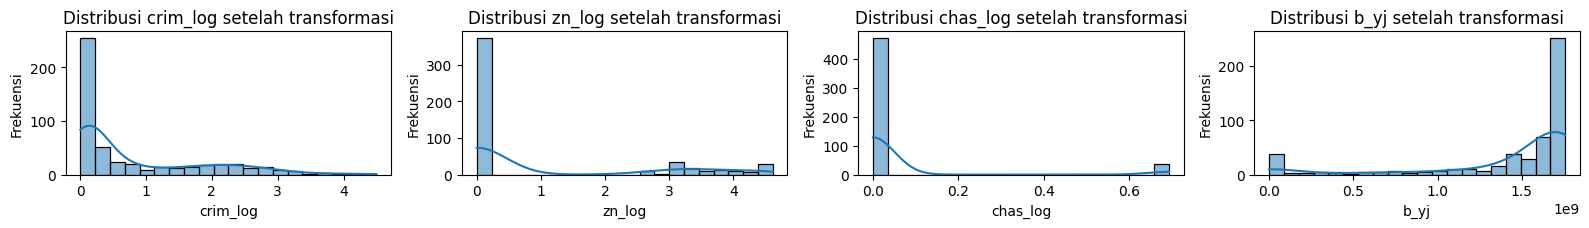

In [24]:
fig, axes = plt.subplots(4, 4, figsize=(16, 8))  # 4x4 grid, total 16 subplot
axes = axes.flatten()

# Looping buat plot tiap fitur
for i, feature in enumerate(transformed_features):
    sns.histplot(df[feature], kde=True, bins=20, ax=axes[i])
    axes[i].set_title(f'Distribusi {feature} setelah transformasi')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frekuensi')

# Hapus axes yang tidak terpakai (biar tidak nampilin plot kosong)
for j in range(i + 1, 16):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Copy dataset dan replace fitur asli dengan transformasi yang sudah dibuat
df_model = df.copy()
df_model['crim'] = df_model['crim_log']
df_model['zn']   = df_model['zn_log']
df_model['chas'] = df_model['chas_log']
df_model['b']    = df_model['b_yj']

# Misal targetnya tetap 'medv'
X = df_model.drop(['medv', 'crim_log', 'zn_log', 'chas_log', 'b_yj'], axis=1)
y = df_model['medv']

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training model Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 24.950581042460257


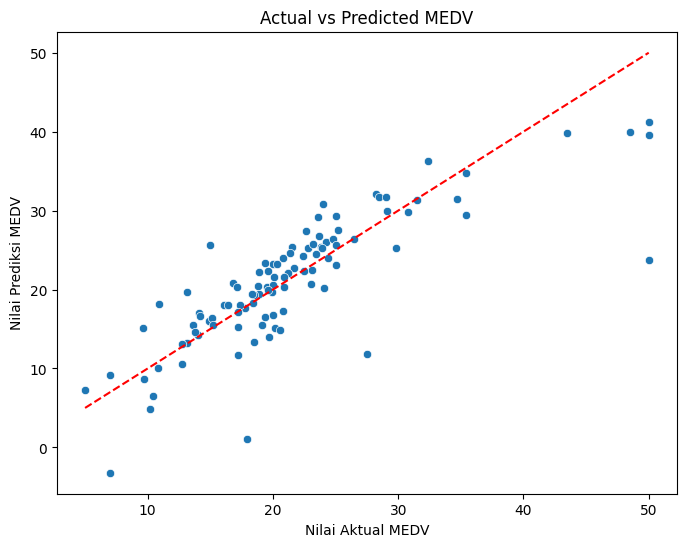

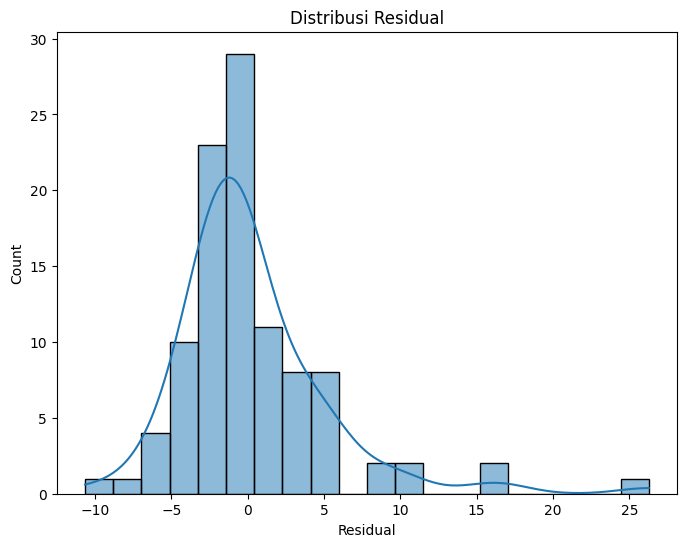

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Nilai Aktual MEDV")
plt.ylabel("Nilai Prediksi MEDV")
plt.title("Actual vs Predicted MEDV")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Garis prediksi sempurna
plt.show()

# Visualisasi distribusi residual
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=20)
plt.xlabel("Residual")
plt.title("Distribusi Residual")
plt.show()


BOX-COX TRANSFORM

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [28]:
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)
print(df.head())


      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [29]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


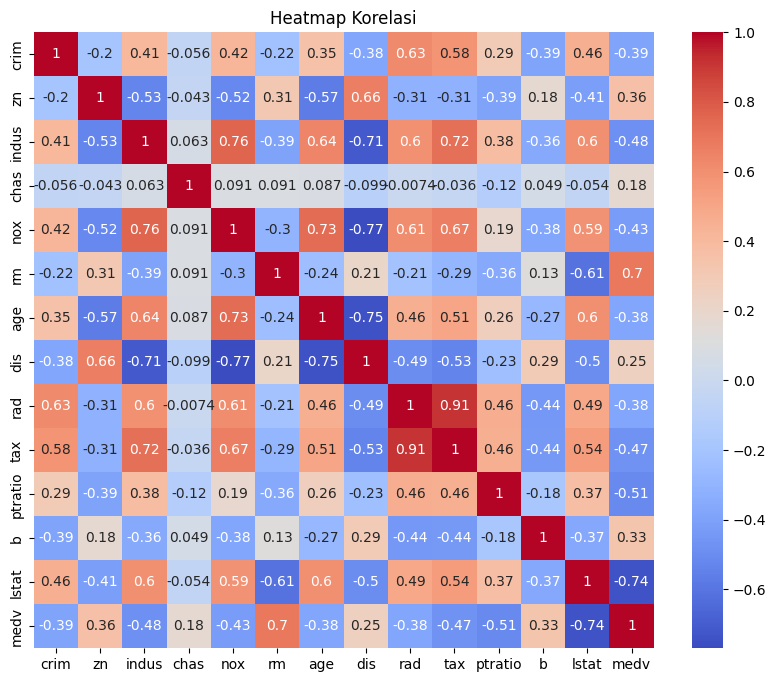

In [30]:
corr = df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Heatmap Korelasi")
plt.show()


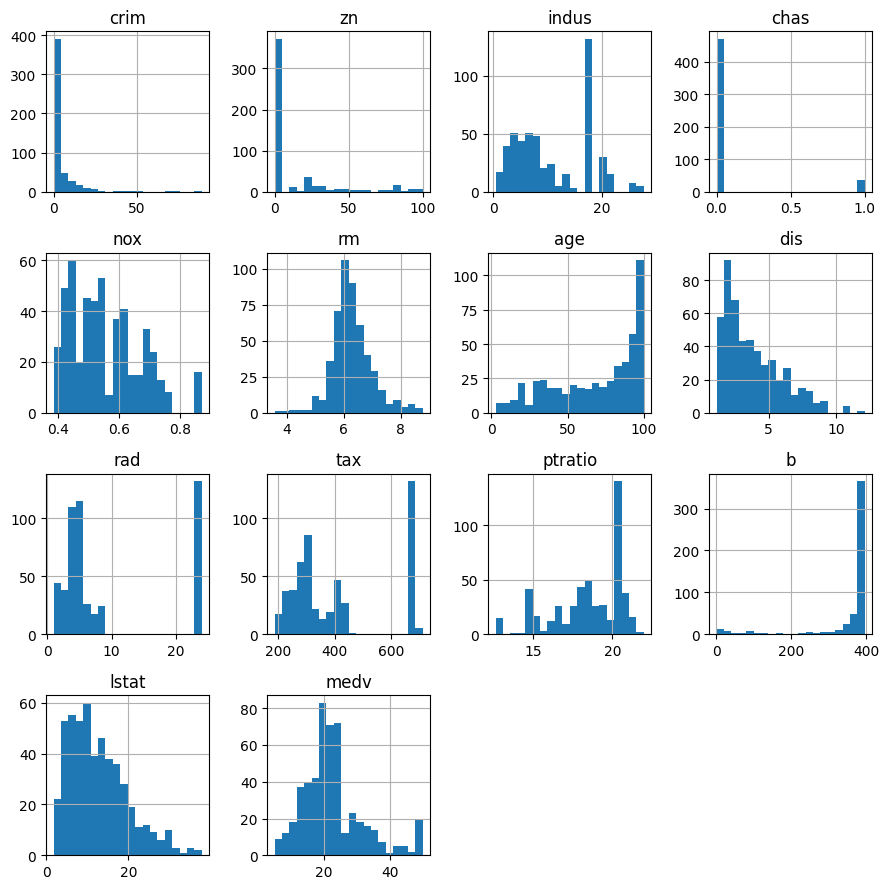

In [31]:
df.hist(bins=20, figsize=(9, 9))
plt.tight_layout()
plt.show()


Skewness tiap fitur sebelum transformasi:
crim       5.223149
zn         2.225666
indus      0.295022
chas       3.405904
nox        0.729308
rm         0.403612
age       -0.598963
dis        1.011781
rad        1.004815
tax        0.669956
ptratio   -0.802325
b         -2.890374
lstat      0.906460
medv       1.108098
dtype: float64


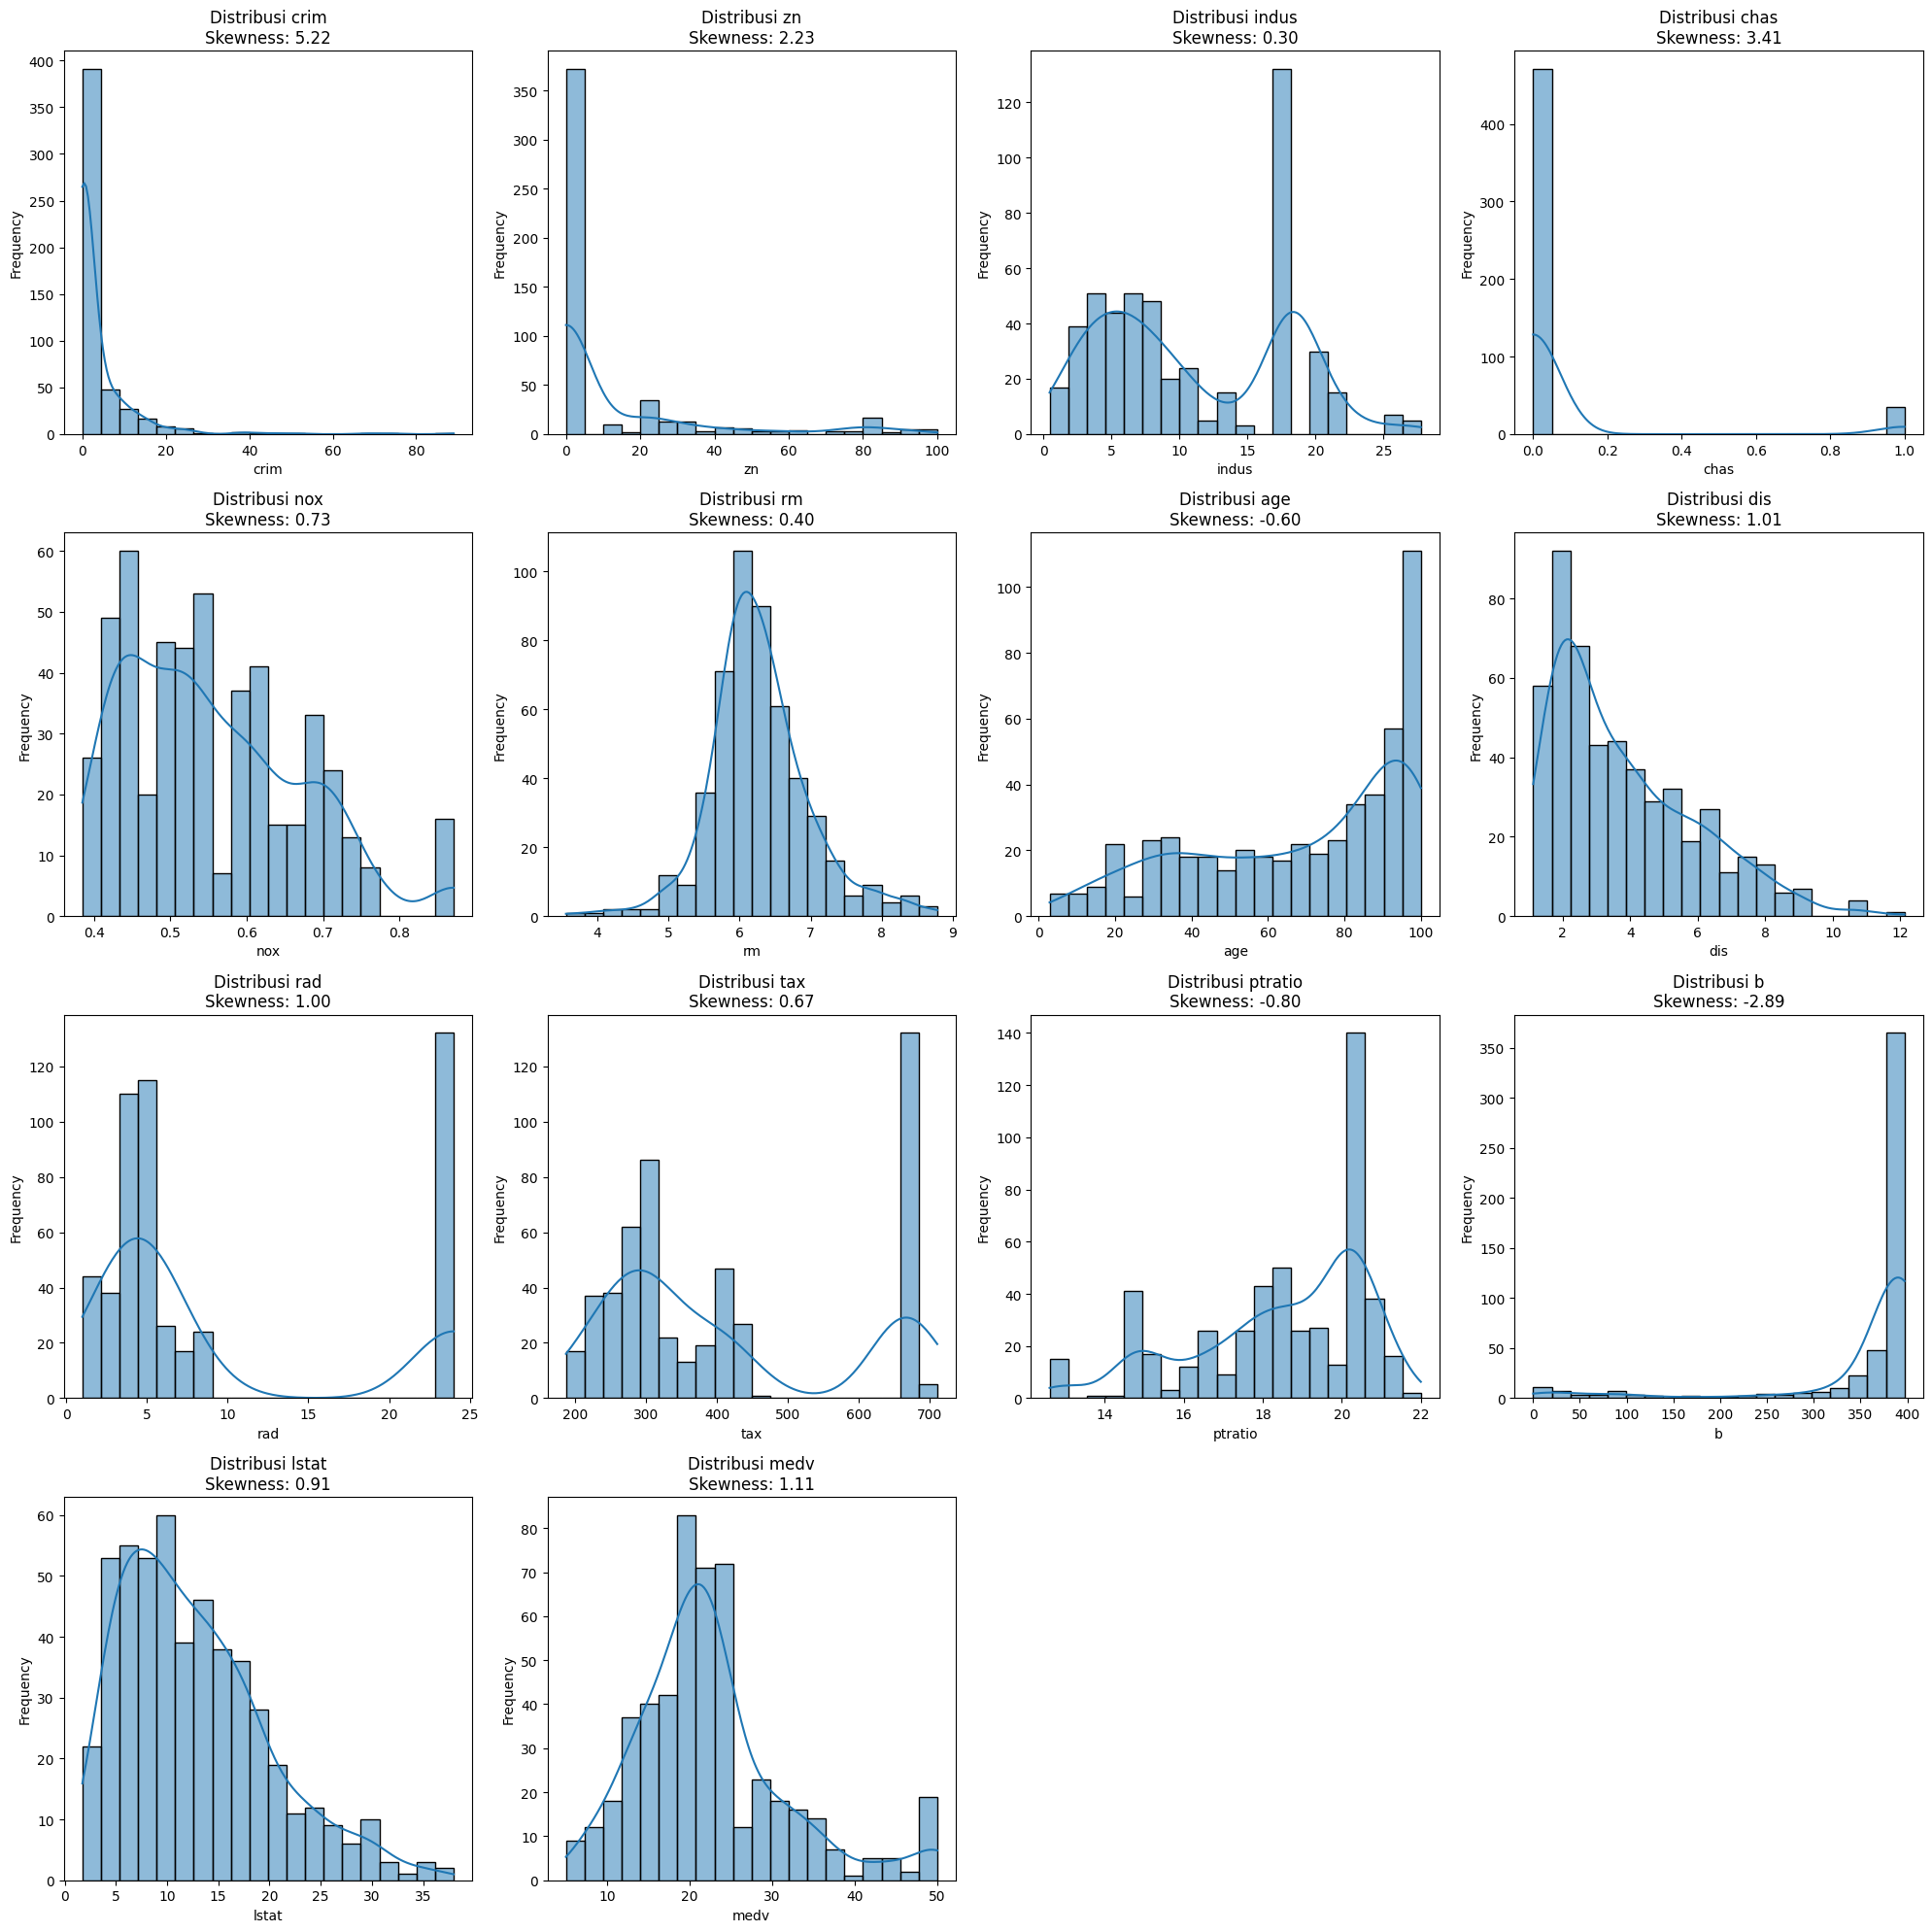

In [32]:
print("Skewness tiap fitur sebelum transformasi:")
print(df.skew())

fig, axes = plt.subplots(4, 4, figsize=(20, 20))
axes = axes.flatten()

for ax, col in zip(axes, df.columns):
    sns.histplot(df[col], kde=True, bins=20, ax=ax)
    ax.set_title(f'Distribusi {col}\nSkewness: {df[col].skew():.2f}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

if len(df.columns) < len(axes):
    for ax in axes[len(df.columns):]:
        ax.axis('off')

plt.tight_layout()
plt.show()


In [33]:
# Box-Cox hanya bisa diterapkan pada data positif, jadi harus offset jika ada nilai nol atau negatif
boxcox_features = ['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']
df_boxcox = df.copy()

for feature in boxcox_features:
    df_boxcox[feature], _ = stats.boxcox(df_boxcox[feature] + 1)  # Tambah 1 agar semua nilai positif

print("Skewness setelah transformasi Box-Cox:")
print(df_boxcox[boxcox_features].skew())


Skewness setelah transformasi Box-Cox:
crim       0.595482
zn         1.071695
indus     -0.104641
nox        0.098431
rm         0.023275
age       -0.417736
dis        0.067176
rad        0.065818
tax        0.079613
ptratio   -0.220097
b         -1.908672
lstat     -0.017928
dtype: float64


In [34]:
transformed_features = boxcox_features


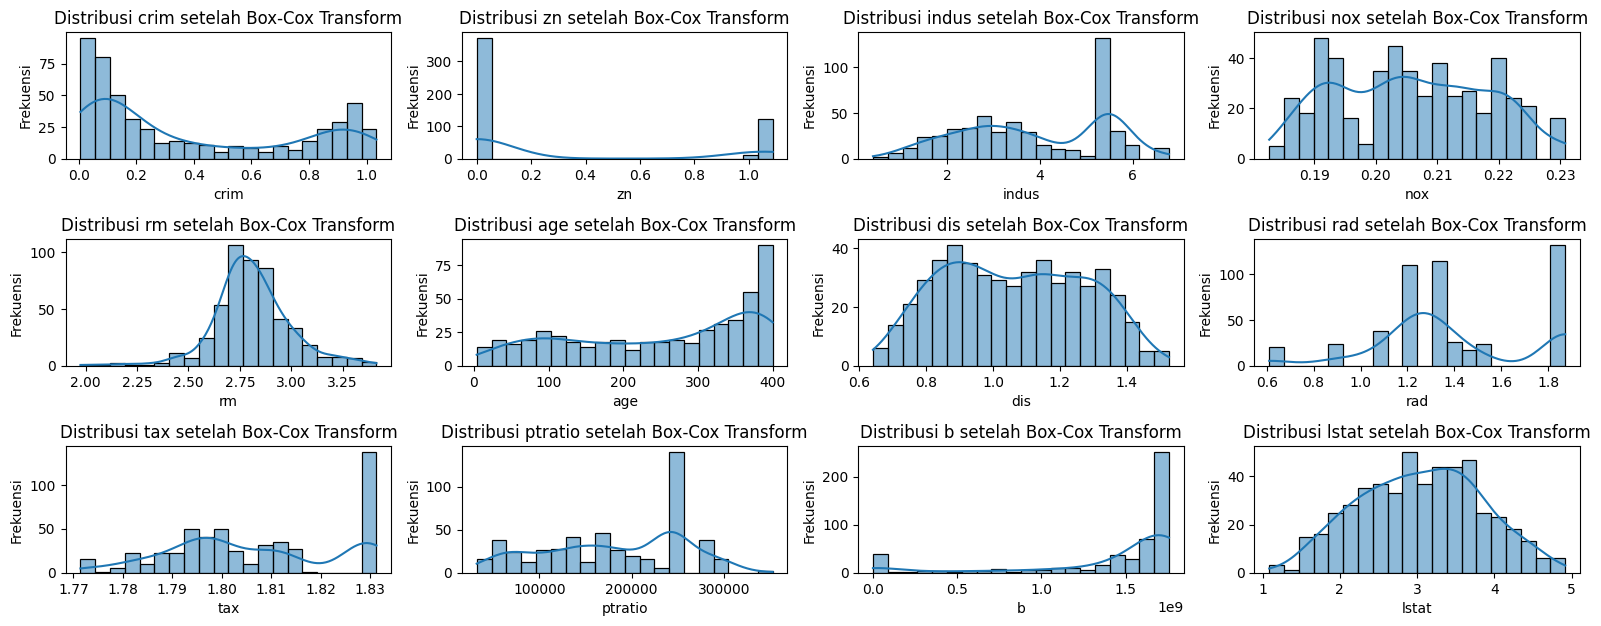

In [35]:
fig, axes = plt.subplots(4, 4, figsize=(16, 8))
axes = axes.flatten()

for i, feature in enumerate(transformed_features):
    sns.histplot(df_boxcox[feature], kde=True, bins=20, ax=axes[i])
    axes[i].set_title(f'Distribusi {feature} setelah Box-Cox Transform')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frekuensi')

for j in range(i + 1, 16):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [36]:
df_model = df_boxcox.copy()
X = df_model.drop(['medv'], axis=1)  # Target tetap 'medv'
y = df_model['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error setelah Box-Cox Transform:", mse)


Mean Squared Error setelah Box-Cox Transform: 19.748048395928727


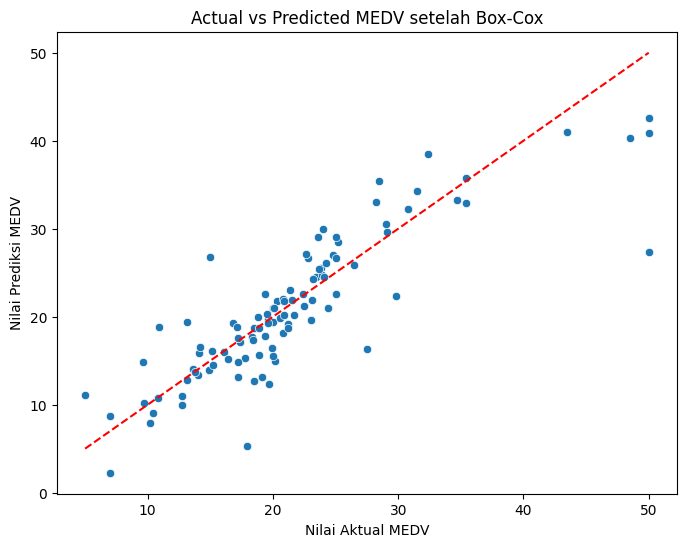

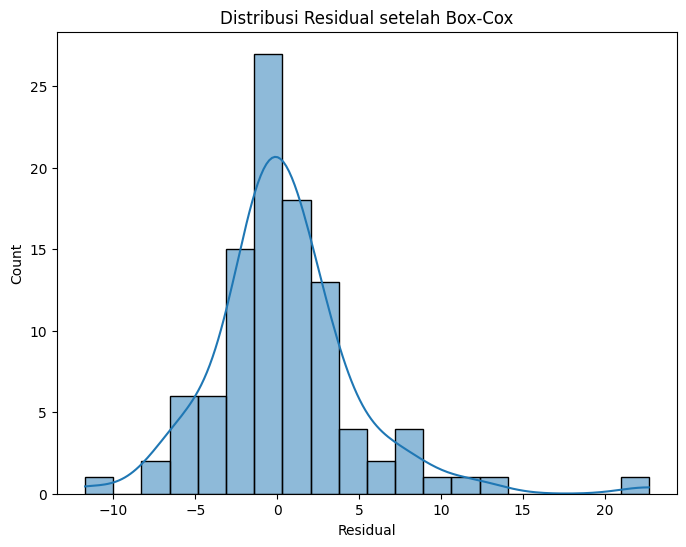

In [37]:
# Visualisasi Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Nilai Aktual MEDV")
plt.ylabel("Nilai Prediksi MEDV")
plt.title("Actual vs Predicted MEDV setelah Box-Cox")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

# Visualisasi distribusi residual
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=20)
plt.xlabel("Residual")
plt.title("Distribusi Residual setelah Box-Cox")
plt.show()


QUANTILE TRANSFORM

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import QuantileTransformer


In [39]:
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)
print(df.head())


      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [40]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


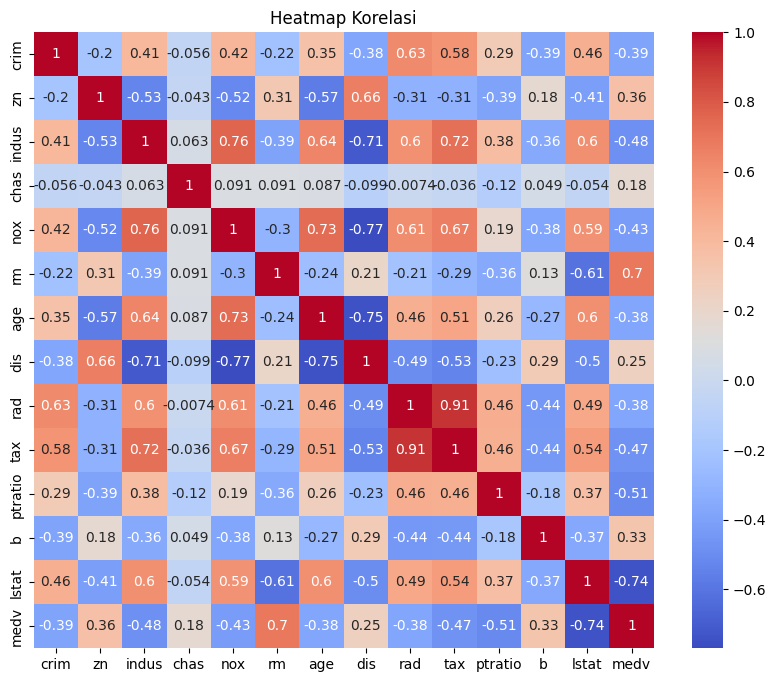

In [41]:
corr = df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Heatmap Korelasi")
plt.show()


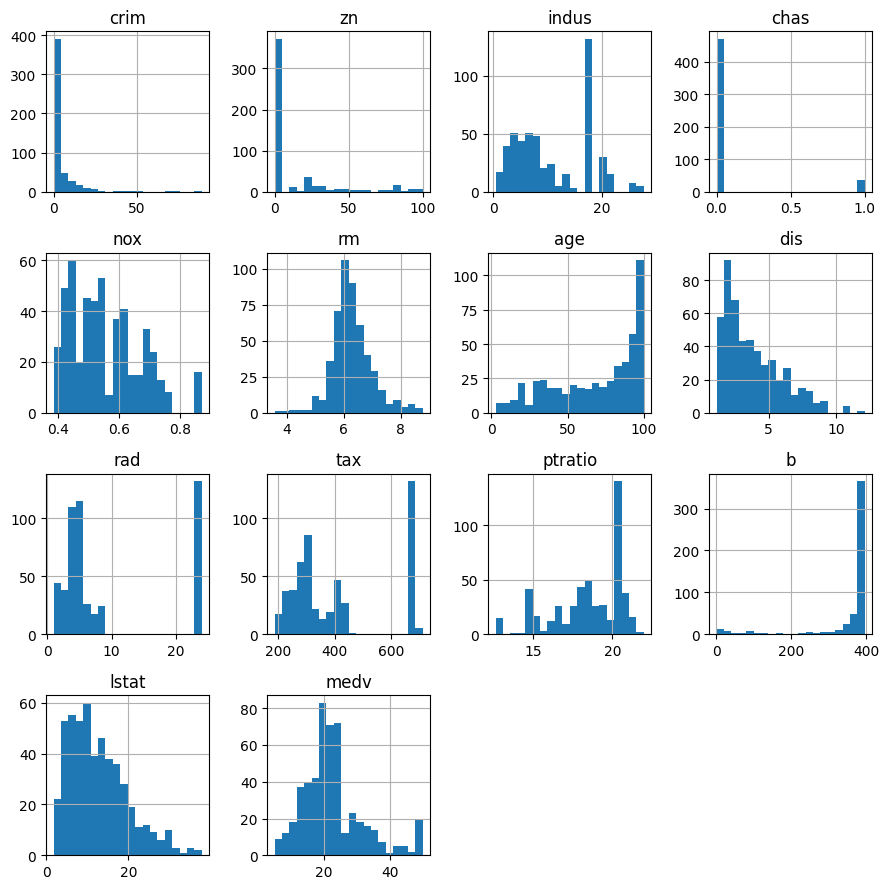

In [42]:
df.hist(bins=20, figsize=(9, 9))
plt.tight_layout()
plt.show()


Skewness tiap fitur sebelum transformasi:
crim       5.223149
zn         2.225666
indus      0.295022
chas       3.405904
nox        0.729308
rm         0.403612
age       -0.598963
dis        1.011781
rad        1.004815
tax        0.669956
ptratio   -0.802325
b         -2.890374
lstat      0.906460
medv       1.108098
dtype: float64


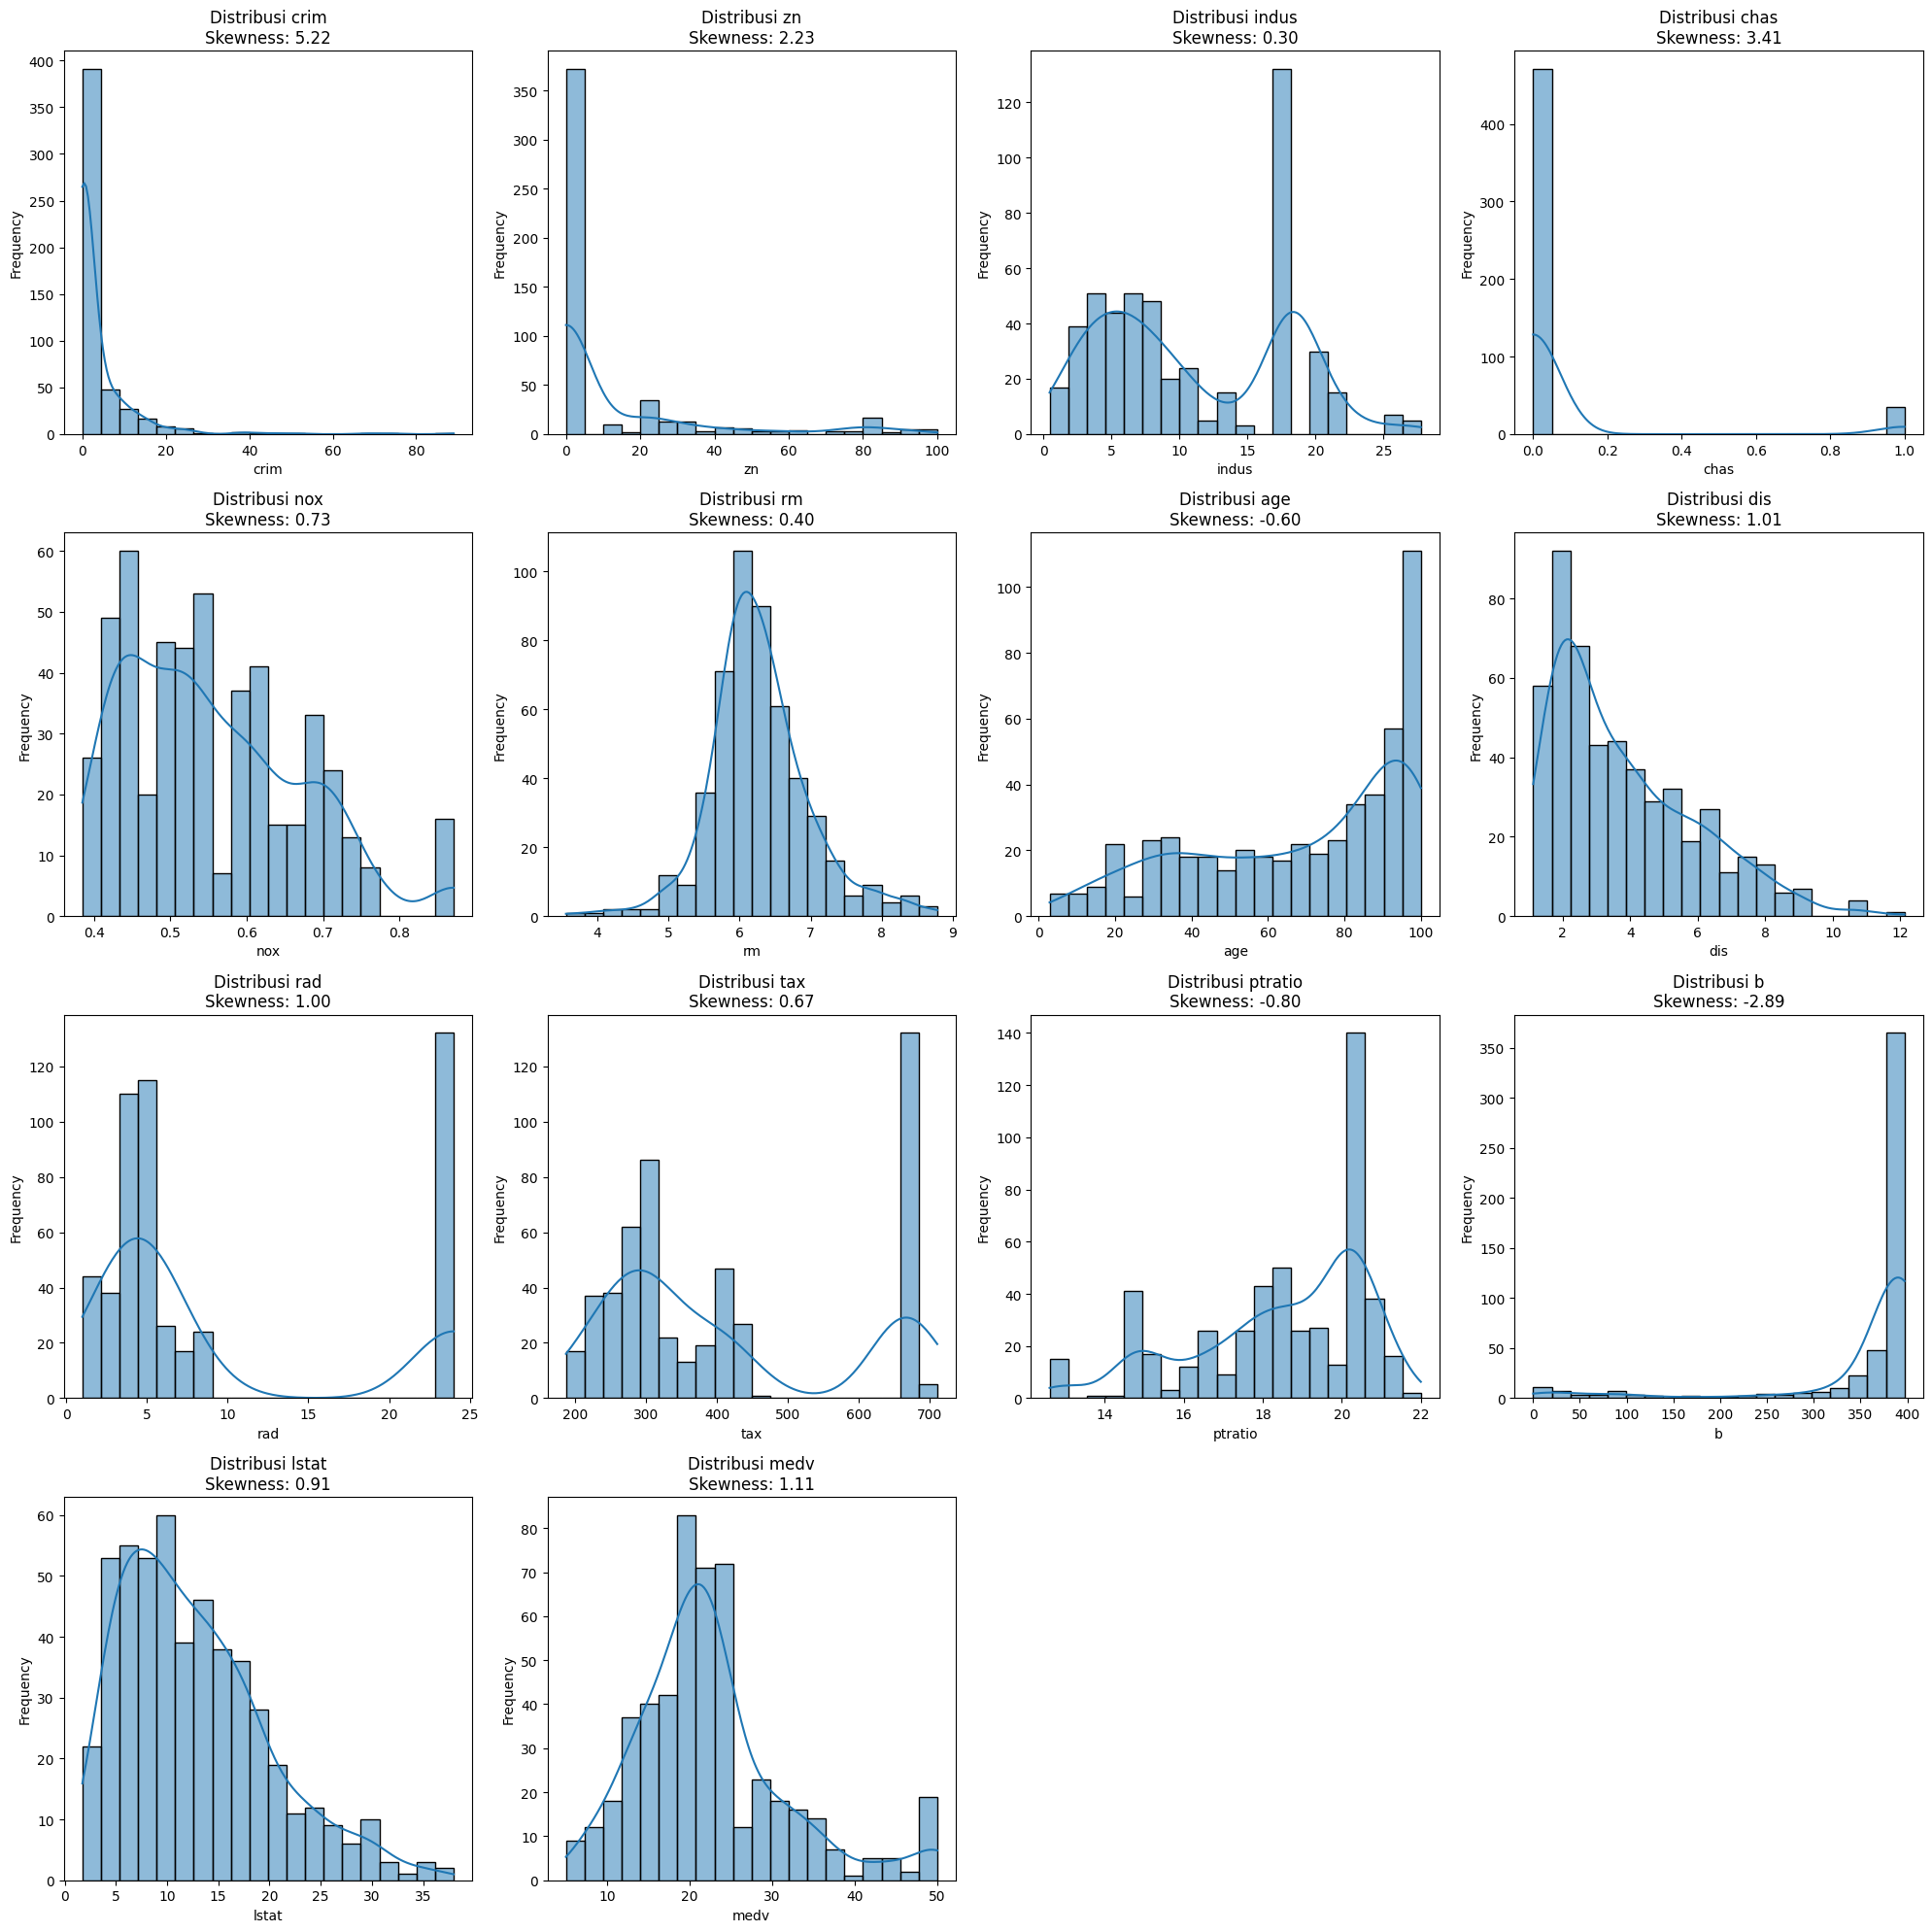

In [43]:
print("Skewness tiap fitur sebelum transformasi:")
print(df.skew())

fig, axes = plt.subplots(4, 4, figsize=(20, 20))
axes = axes.flatten()

for ax, col in zip(axes, df.columns):
    sns.histplot(df[col], kde=True, bins=20, ax=ax)
    ax.set_title(f'Distribusi {col}\nSkewness: {df[col].skew():.2f}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

if len(df.columns) < len(axes):
    for ax in axes[len(df.columns):]:
        ax.axis('off')

plt.tight_layout()
plt.show()


In [44]:
# QuantileTransformer dengan output distribusi normal
quantile_features = df.columns.drop("medv")  # Kecuali target
qt = QuantileTransformer(output_distribution='normal', random_state=42)
df_qt = df.copy()
df_qt[quantile_features] = qt.fit_transform(df_qt[quantile_features])

print("Skewness setelah Quantile Transform:")
print(df_qt[quantile_features].skew())


Skewness setelah Quantile Transform:
crim       0.000025
zn         1.112366
indus      0.647900
chas       3.405904
nox        1.492388
rm         0.000272
age        1.690177
dis       -0.002964
rad        0.438373
tax        0.603074
ptratio   -0.223356
b          0.951123
lstat      0.000101
dtype: float64


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (506). n_quantiles is set to n_samples.
  warnings.warn(


In [45]:
transformed_features = quantile_features


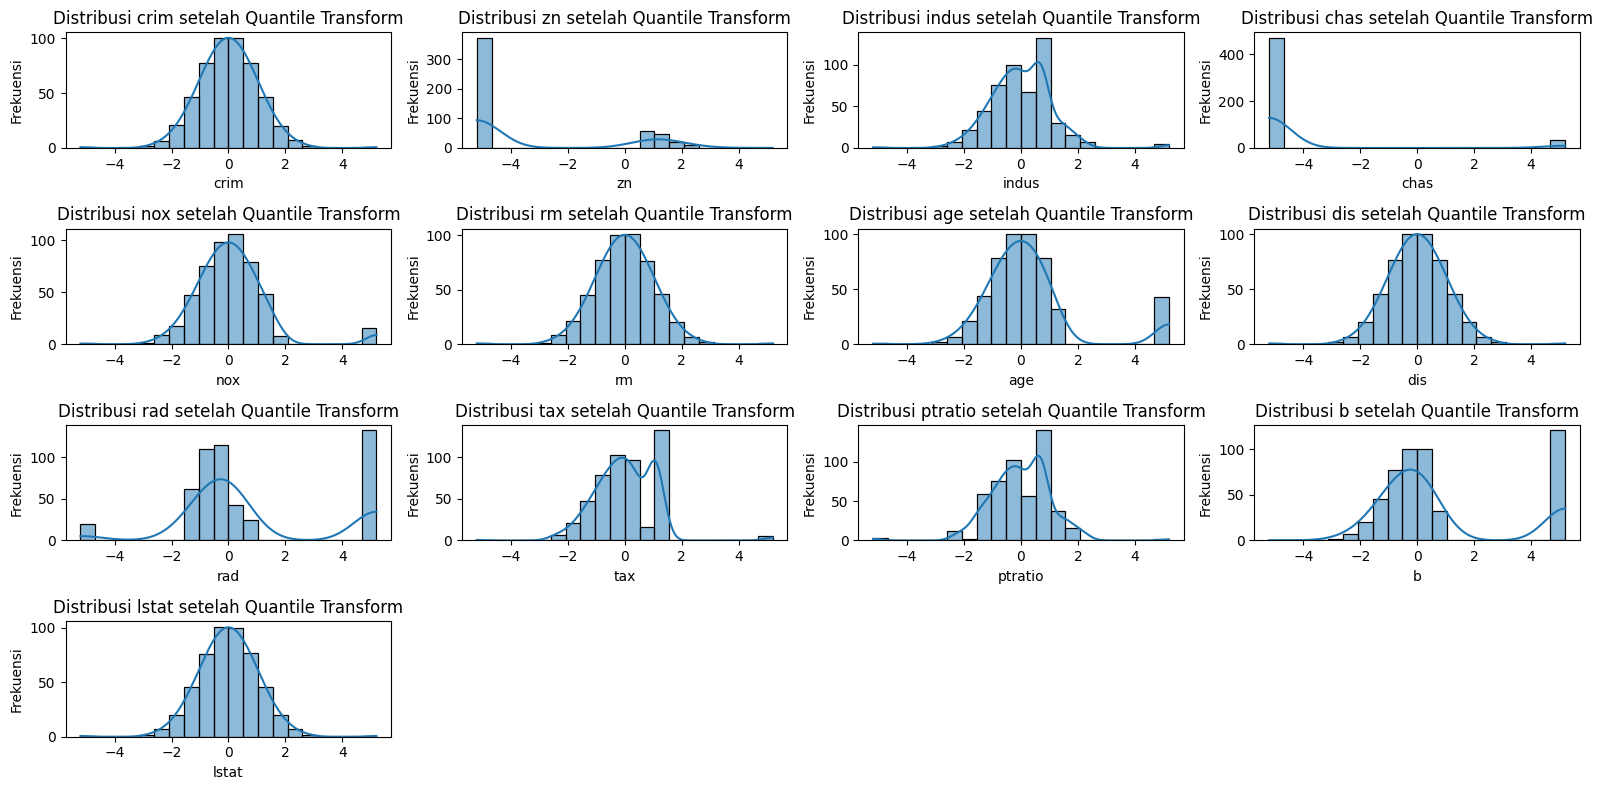

In [46]:
fig, axes = plt.subplots(4, 4, figsize=(16, 8))
axes = axes.flatten()

for i, feature in enumerate(transformed_features):
    sns.histplot(df_qt[feature], kde=True, bins=20, ax=axes[i])
    axes[i].set_title(f'Distribusi {feature} setelah Quantile Transform')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frekuensi')

for j in range(i + 1, 16):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [47]:
df_model = df_qt.copy()
X = df_model.drop(['medv'], axis=1)  # Target tetap 'medv'
y = df_model['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error setelah Quantile Transform:", mse)


Mean Squared Error setelah Quantile Transform: 19.45753062272867


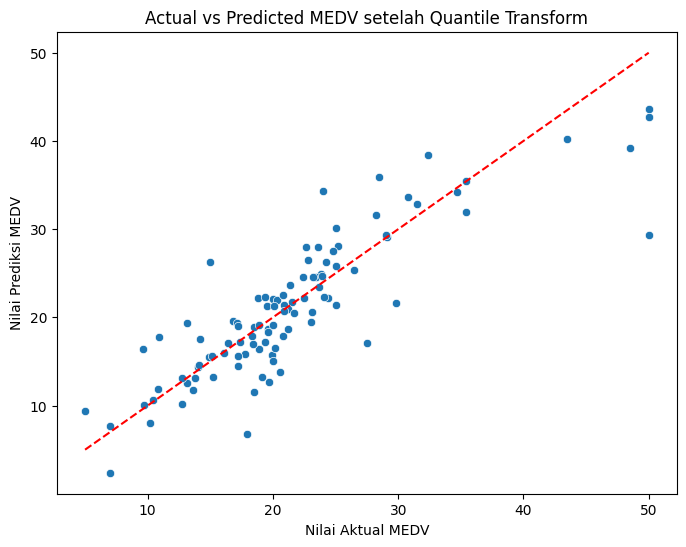

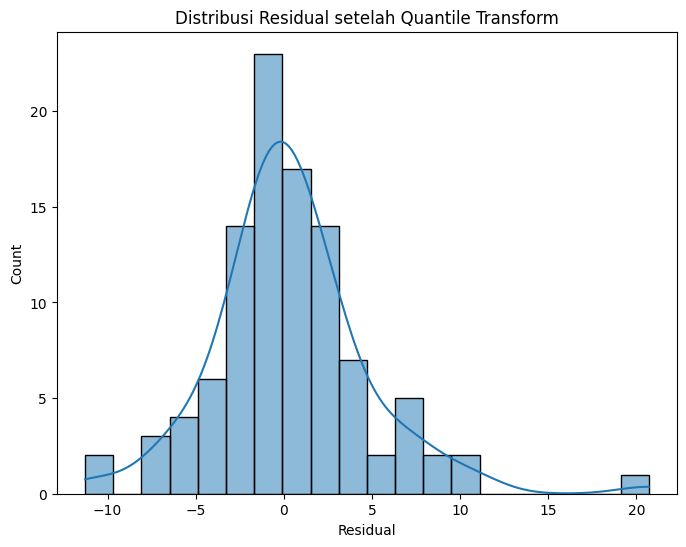

In [48]:
# Visualisasi Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Nilai Aktual MEDV")
plt.ylabel("Nilai Prediksi MEDV")
plt.title("Actual vs Predicted MEDV setelah Quantile Transform")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

# Visualisasi distribusi residual
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=20)
plt.xlabel("Residual")
plt.title("Distribusi Residual setelah Quantile Transform")
plt.show()


# Normalisasi dan Standardisasi Data

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [50]:
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)
print(df.head())


      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [51]:
df_outlier = df.copy()

# Tambahkan outlier pada fitur 'crim' dan 'tax'
df_outlier.loc[0, 'crim'] = df_outlier['crim'].max() * 10
df_outlier.loc[1, 'tax'] = df_outlier['tax'].max() * 10


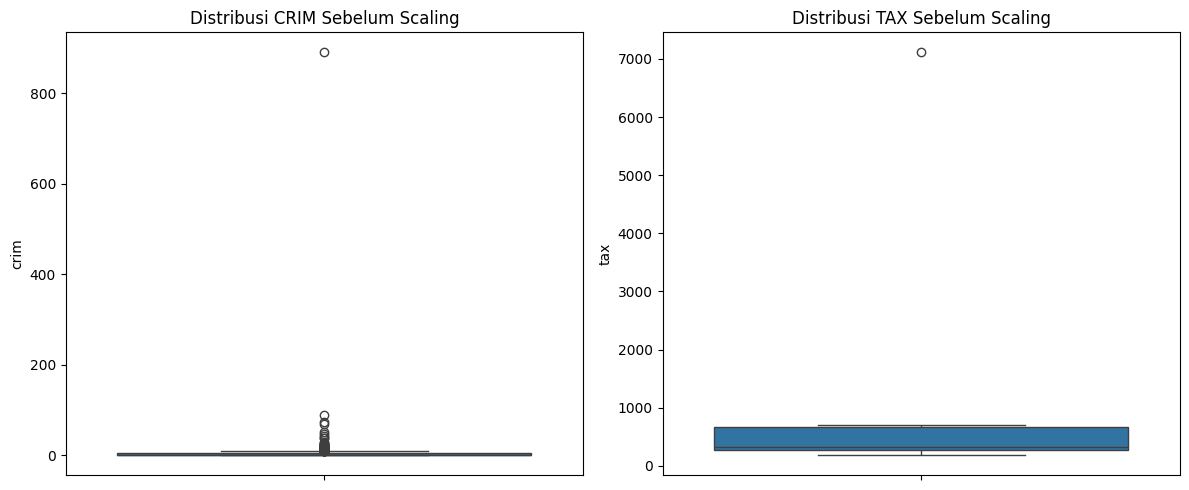

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(y=df_outlier['crim'], ax=axes[0])
axes[0].set_title("Distribusi CRIM Sebelum Scaling")

sns.boxplot(y=df_outlier['tax'], ax=axes[1])
axes[1].set_title("Distribusi TAX Sebelum Scaling")

plt.tight_layout()
plt.show()


In [53]:
scalers = {
    "MinMaxScaler": MinMaxScaler(),
    "StandardScaler": StandardScaler(),
    "RobustScaler": RobustScaler()
}

df_scaled = {}

for name, scaler in scalers.items():
    df_temp = df_outlier.copy()
    df_temp[df_temp.columns.drop("medv")] = scaler.fit_transform(df_temp[df_temp.columns.drop("medv")])
    df_scaled[name] = df_temp


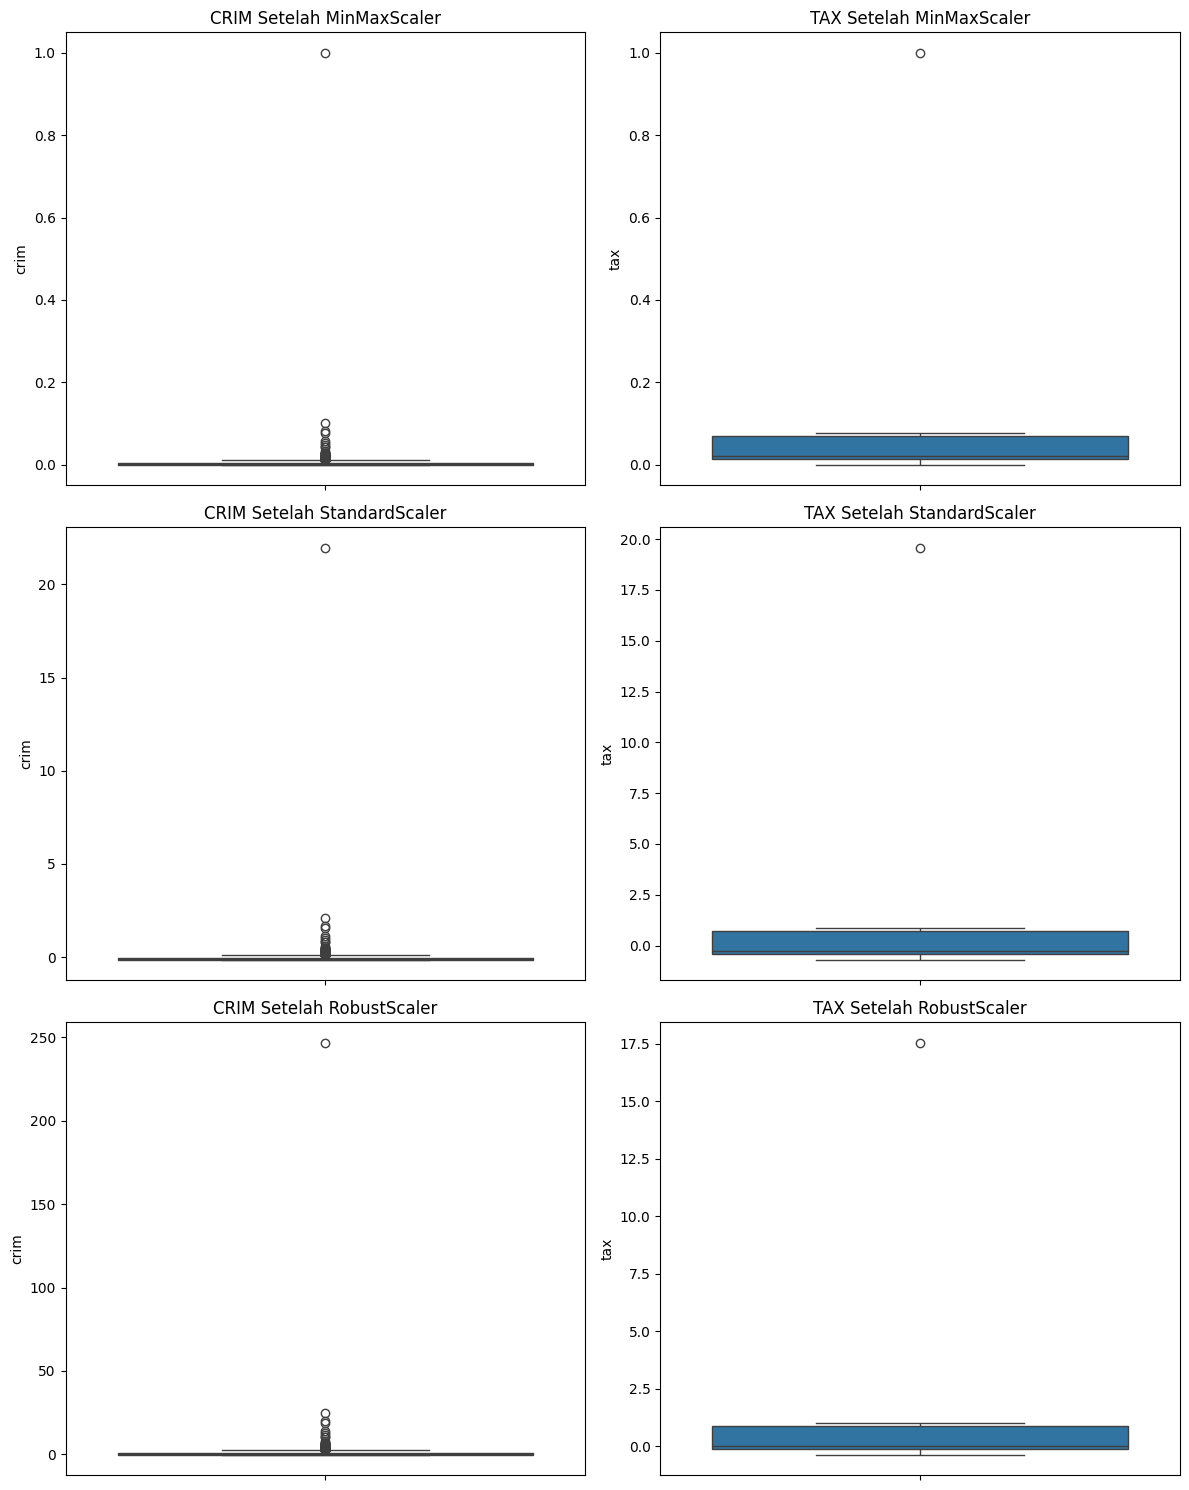

In [54]:
fig, axes = plt.subplots(3, 2, figsize=(12, 15))

for i, (name, df_temp) in enumerate(df_scaled.items()):
    sns.boxplot(y=df_temp['crim'], ax=axes[i, 0])
    axes[i, 0].set_title(f"CRIM Setelah {name}")

    sns.boxplot(y=df_temp['tax'], ax=axes[i, 1])
    axes[i, 1].set_title(f"TAX Setelah {name}")

plt.tight_layout()
plt.show()


In [55]:
results = {}

for name, df_temp in df_scaled.items():
    X = df_temp.drop(['medv'], axis=1)
    y = df_temp['medv']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    results[name] = mse
    print(f"MSE dengan {name}: {mse}")


MSE dengan MinMaxScaler: 109.40439604635009
MSE dengan StandardScaler: 109.40439604635029
MSE dengan RobustScaler: 109.40439604635037


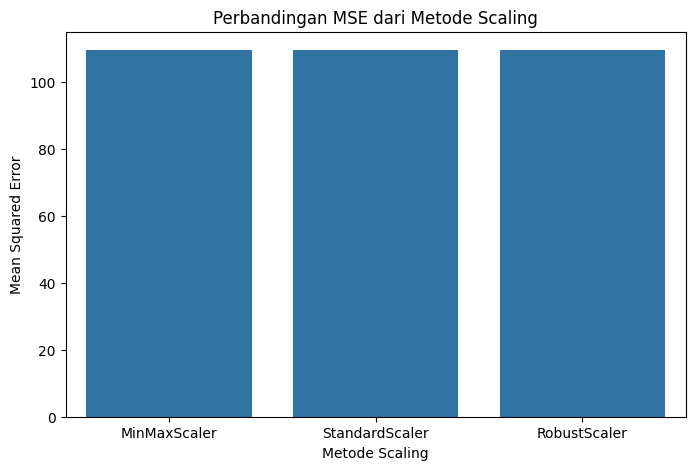

In [56]:
plt.figure(figsize=(8, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.xlabel("Metode Scaling")
plt.ylabel("Mean Squared Error")
plt.title("Perbandingan MSE dari Metode Scaling")
plt.show()


Kesimpulan :
1. MinMaxScaler: Cenderung buruk jika ada outlier, karena semua nilai dipetakan ke [0,1].
2. StandardScaler: Rentan terhadap outlier karena mempertimbangkan distribusi normal.
3. RobustScaler: Paling stabil terhadap outlier karena menggunakan IQR (Interquartile Range).

# Discretization pada Fitur Numerik

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import KBinsDiscretizer


In [58]:
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)
print(df.head())


      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [59]:
num_features = ['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'tax', 'ptratio', 'b', 'lstat']
df_disc = df.copy()


In [60]:
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')  # 5 bins dengan metode quantile
df_disc[num_features] = discretizer.fit_transform(df_disc[num_features])


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 9 are removed. Consider decreasing the number of bins.
  warnings.warn(


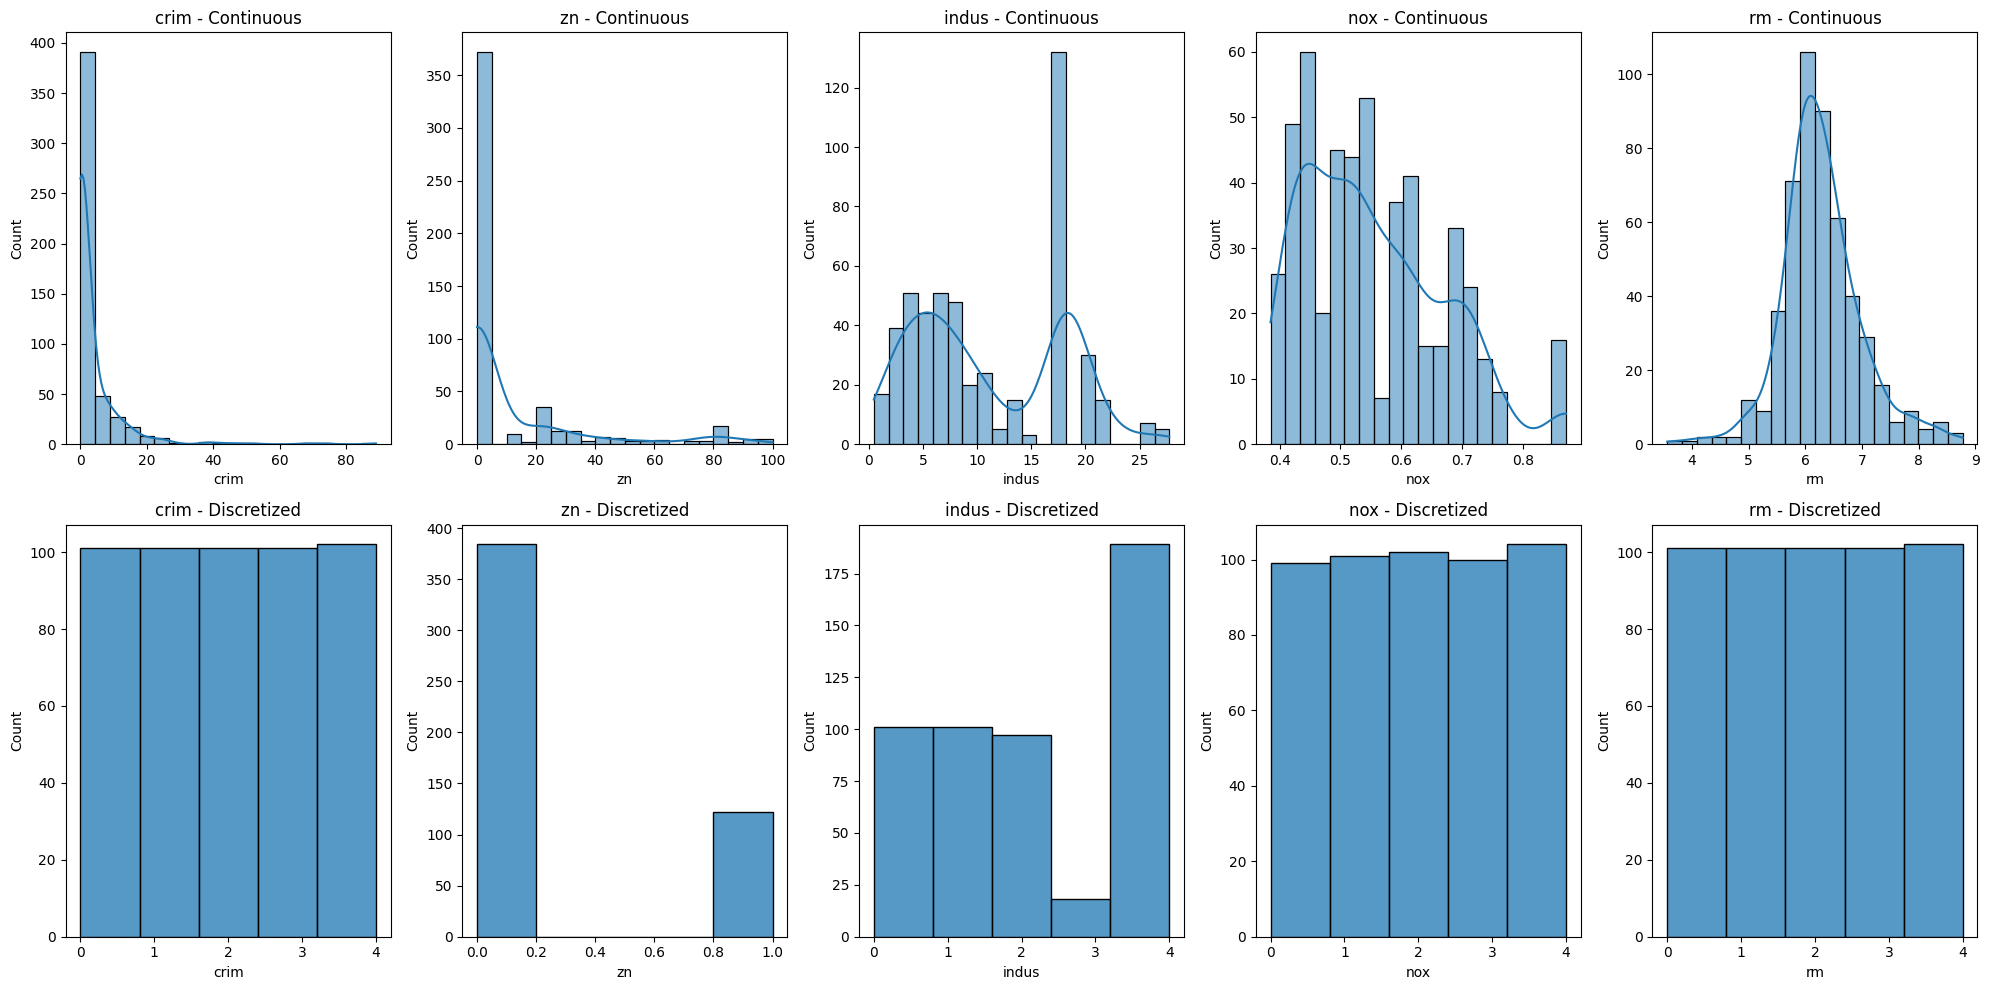

In [61]:
fig, axes = plt.subplots(2, len(num_features)//2, figsize=(20, 10))

for i, feature in enumerate(num_features[:len(num_features)//2]):
    sns.histplot(df[feature], bins=20, kde=True, ax=axes[0, i])
    axes[0, i].set_title(f"{feature} - Continuous")

    sns.histplot(df_disc[feature], bins=5, kde=False, ax=axes[1, i])
    axes[1, i].set_title(f"{feature} - Discretized")

plt.tight_layout()
plt.show()


In [62]:
def train_and_evaluate(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse

# Model dengan fitur kontinu
X_cont = df.drop(['medv'], axis=1)
y = df['medv']
mse_cont = train_and_evaluate(X_cont, y)

# Model dengan fitur discretized
X_disc = df_disc.drop(['medv'], axis=1)
mse_disc = train_and_evaluate(X_disc, y)

print(f"MSE dengan fitur kontinu: {mse_cont}")
print(f"MSE dengan fitur discretized: {mse_disc}")


MSE dengan fitur kontinu: 24.291119474973478
MSE dengan fitur discretized: 26.96814687339891


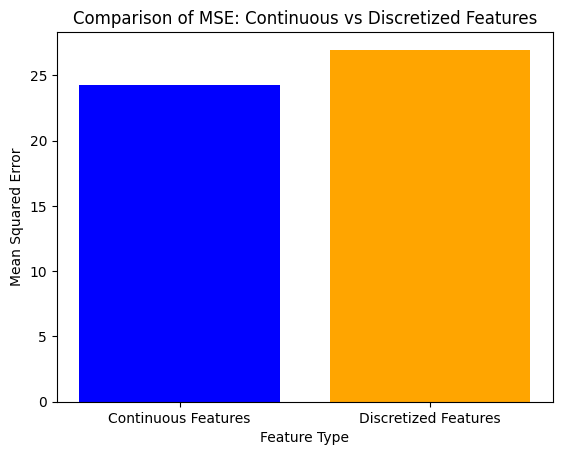

In [63]:
plt.bar(["Continuous Features", "Discretized Features"], [mse_cont, mse_disc], color=['blue', 'orange'])
plt.xlabel("Feature Type")
plt.ylabel("Mean Squared Error")
plt.title("Comparison of MSE: Continuous vs Discretized Features")
plt.show()


Kesimpulan
1. Jika MSE berkurang setelah discretization, berarti model lebih baik dalam menangani data kategori.
2. Jika MSE meningkat, berarti fitur kontinu lebih baik untuk model ini.
3. Discretization bisa membantu jika fitur memiliki distribusi yang sangat skewed atau non-linear terhadap target.